-------------------

# Python geospatial data analysis

Saverio Mancino

--------------


## Lesson Overview

This lesson is designed to provide a comprehensive exploration of scientific data visualization and geospatial data processing using Python.\
In this lesson you will learn how to:
- Create and customize scientific plots using Matplotlib and Seaborn;
- Process, analyze, and visualize raster data with Rasterio;
- Manage and visualize vector data using Geopandas.




## Objectives

By the end of this lesson, you should be able to:

- Build and customize scientific plots using Matplotlib and Seaborn;
- Process and visualize raster datasets using Rasterio;
- Handle vector data and perform spatial analysis with Geopandas;
- Apply advanced visualization and geospatial processing techniques;
- Complete practical exercises to reinforce your learning

------------------------

## Table of Contents

1. [Matplotlib and Seaborn for Scientific Plots](#1)
2. [Rasterio for Raster Processing and Visualization](#2)
3. [Geopandas for Vector Processing and Visualization](#3)
4. [Exercises](#4)


------------

## Open the notebook lesson

Open the lesson using the CL

    cd /media/sf_LVM_shared/my_SE_data/exercise
    jupyter-lab Python_geospatial_data_analysis_SM.ipynb


### Library dependencies fixing

Let's check all dependency compatibilities between `numpy` `pandas` `matplotlib` `seaborn` `rasterio` `fiona` `scipy` `shapely` and `pyproj`.\
We need to make sure to use the intercompatible version of each library.

In [ ]:
!pip show numpy pandas matplotlib seaborn rasterio fiona shapely pyproj scipy | grep Version:

Version: 1.26.4
Version: 1.3.5
Version: 3.10.1
Version: 0.13.2
Version: 1.3.4
Version: 1.8.22
Version: 1.8.5
Version: 3.4.0
Version: 1.15.0


Run this command in the terminal, to remove the version of `matplotlib` installed via the operating system's package manager (APT) instead of with PIP.

            sudo apt remove python3-matplotlib

Them procede to reinstall from scratch all libraries.

In [ ]:
!pip uninstall -y numpy pandas matplotlib seaborn rasterio fiona shapely pyproj scipy

Found existing installation: numpy 2.2.4
Uninstalling numpy-2.2.4:
  Successfully uninstalled numpy-2.2.4
Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
Found existing installation: matplotlib 3.10.1
Uninstalling matplotlib-3.10.1:
  Successfully uninstalled matplotlib-3.10.1
Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Successfully uninstalled seaborn-0.13.2
Found existing installation: rasterio 1.4.3
Uninstalling rasterio-1.4.3:
  Successfully uninstalled rasterio-1.4.3
Found existing installation: fiona 1.10.1
Uninstalling fiona-1.10.1:
  Successfully uninstalled fiona-1.10.1
Found existing installation: shapely 2.0.7
Uninstalling shapely-2.0.7:
  Successfully uninstalled shapely-2.0.7
Found existing installation: pyproj 3.7.1
Uninstalling pyproj-3.7.1:
  Successfully uninstalled pyproj-3.7.1
Found existing installation: scipy 1.15.2
Uninstalling scipy-1.15.2:
  Successfully uninstalled scipy

In [ ]:
!pip install --user numpy==1.26.4
!pip install --user shapely==1.8.5
!pip install --user scipy==1.15.0
!pip install --user pandas matplotlib seaborn rasterio fiona pyproj
#!pip install --upgrade --force-reinstall pandas matplotlib seaborn rasterio fiona pyproj

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 11.2 MB/s eta 0:00:00m eta 0:00:010:01:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.8.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 10.7 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [ ]:
!pip show numpy pandas matplotlib seaborn rasterio fiona shapely pyproj | grep Version:

Version: 1.26.4
Version: 1.3.5
Version: 3.10.1
Version: 0.13.2
Version: 1.3.4
Version: 1.8.22
Version: 1.8.5
Version: 3.4.0


## 1 - Matplotlib and Seaborn for Scientific Plots

Data visualization is a crucial aspect of scientific computing, allowing researchers to explore, analyze, and communicate insights from data.\
Python provides powerful libraries for visualization, with `matplotlib` and `seaborn` being two of the most widely used.

- **Matplotlib**: A low-level library that provides detailed control over plot elements.
- **Seaborn**: Built on top of Matplotlib, Seaborn simplifies complex visualizations and adds aesthetically pleasing statistical plots.


### Introduction to Matplotlib
`matplotlib` is a comprehensive library for creating static, animated, and interactive visualizations in Python.\
It provides a MATLAB-like interface and is widely used for generating plots such as line graphs, scatter plots, bar charts, and more.


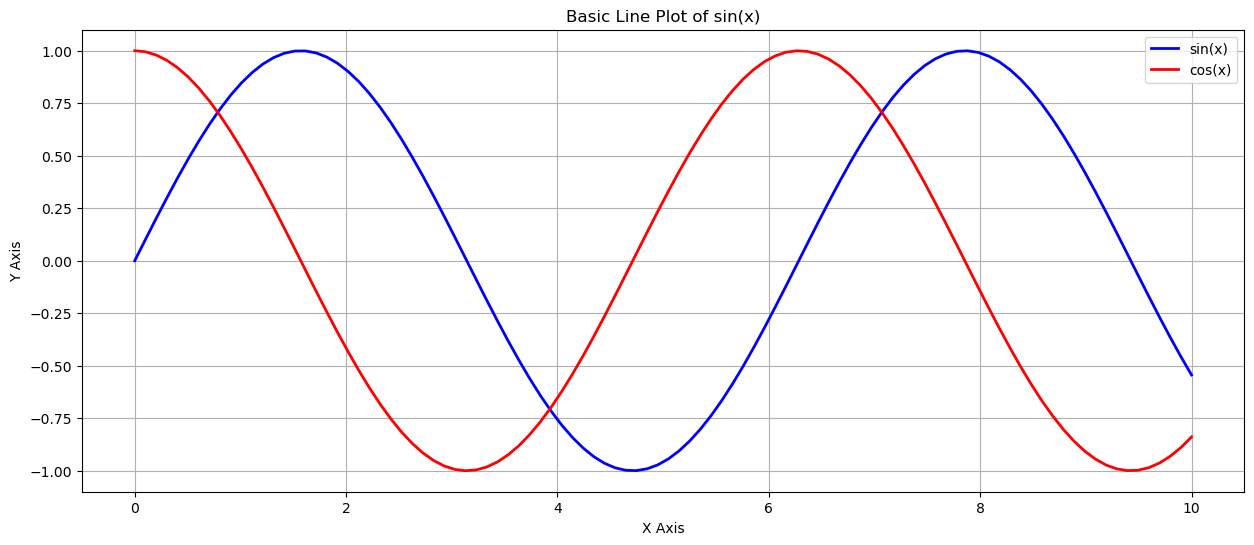

In [ ]:
## imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate some data
x1 = np.linspace(0, 10, 100)
y1 = np.sin(x1)
x2 = np.linspace(0, 10, 100)
y2 = np.cos(x2)
# x3 = np.linspace(0, 10, 100)
# y3 = np.tan(x3)
# Create a basic line plot
plt.figure(figsize=(15, 6))
plt.plot(x1, y1, label='sin(x)', color='blue', linewidth=2)
plt.plot(x2, y2, label='cos(x)', color='red', linewidth=2)
# plt.plot(x3, y3, label='tan(x)', color='green', linewidth=2)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Basic Line Plot of sin(x)')
plt.legend()
plt.grid(True)
plt.show()

For any kind of plot, besides visualization you can also save the result to disk.\
You just need to replace:
>plt.show()

with

>plt.savefig('plot_name.png', dpi=300)  # Saves the plot as a PNG with 300 DPI resolution\
>plt.close()

Now let's try plotting something based on the dataset we downloaded and used in the previous lesson.\
We can try plotting time/temperature diagram.

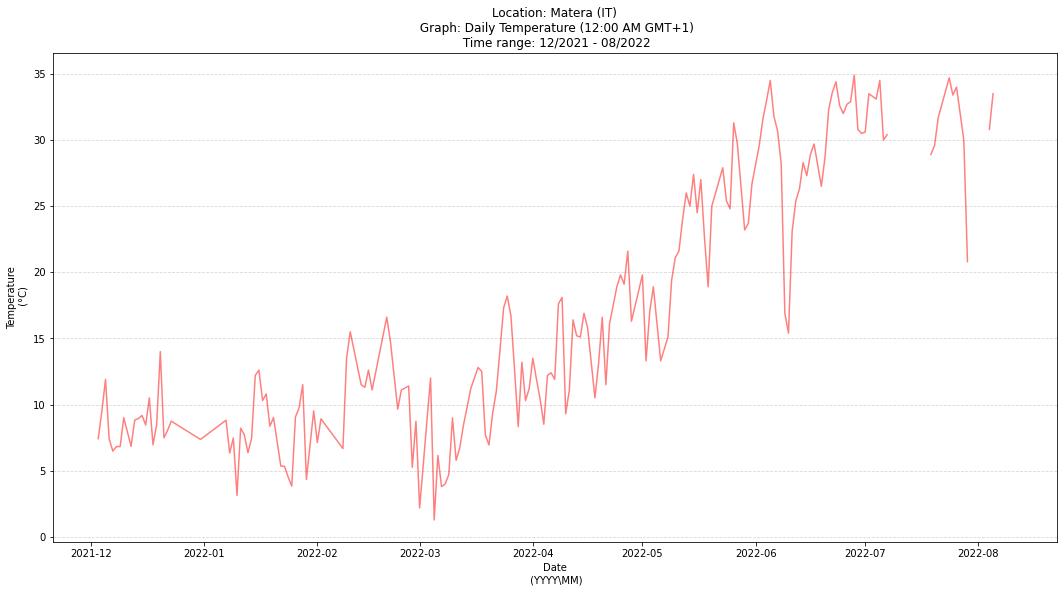

In [ ]:
## Read data
file_path = "files/Dati_Meteo_Giornalieri_Stazione _Matera.csv"
df = pd.read_csv(file_path, sep=',', encoding='utf-8')

## Data preparation
# Convert date column in dd/mm/yyyy format
df['DATA'] = pd.to_datetime(df['DATA'], format='%d/%m/%Y')

# Convert average temperature 'TM'
df['TM'] = df['TM'].replace({',': '.'}, regex=True)  # Force the replace of digital separator commas with dots
df['TM'] = pd.to_numeric(df['TM'], errors='coerce')  # Convert to numeric, invalid parsing will be set to NaN

# Plot
plt.figure(figsize=(18, 9)) # set the graph size
plt.plot(df['DATA'],# x axis
         df['TM'], # y axis
         color='red', # line color
         marker='', # point marker
         linestyle='-', # line style
         markersize=4, # line size
         alpha=0.5 # visibility
         )

# Labels and title
plt.xlabel("Date\n (YYYY\MM)")
plt.ylabel("Temperature\n (°C)")
plt.title("Location: Matera (IT)\n Graph: Daily Temperature (12:00 AM GMT+1)\n Time range: 12/2021 - 08/2022")

# Grid improvements
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

We can also represent data with other types of graphs.\
Let's represent Matera Temperature distibution with a histogram.

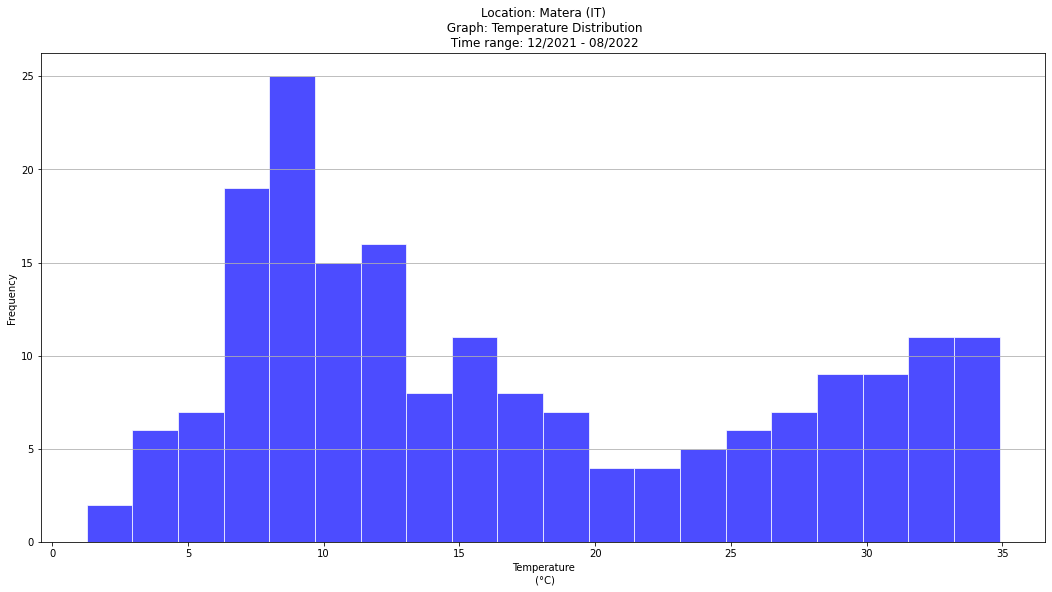

In [ ]:
#Histogram settings

plt.figure(figsize=(18,9)) # set the graph size
plt.hist(df['TM'], # data
         bins=20, # number of bins
         color='blue', # bar color
         edgecolor='white', # bar edges color
         alpha=0.7 # visibility
         )
# Labels
plt.xlabel("Temperature\n (°C)")
plt.ylabel("Frequency")
plt.title("Location: Matera (IT)\n Graph: Temperature Distribution\n Time range: 12/2021 - 08/2022")
plt.grid(axis='y')
plt.show()

And a scatter plot of Matera Temperature vs Humidity.

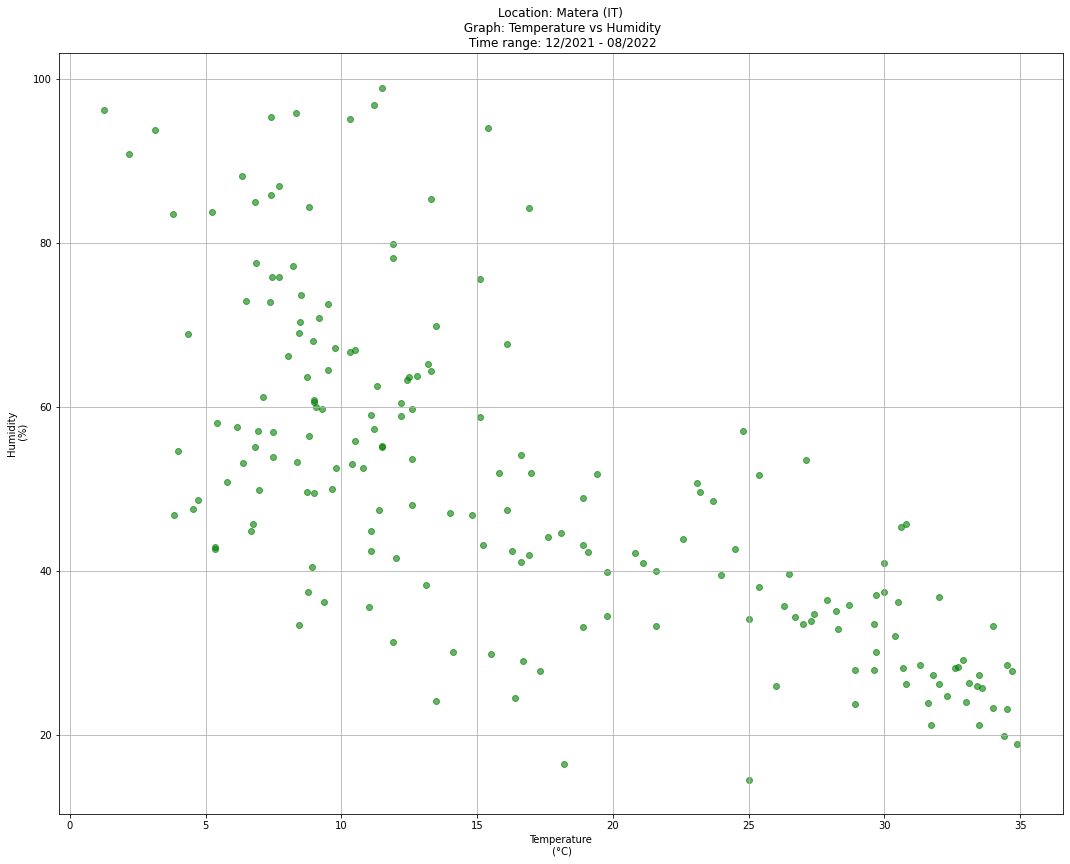

In [ ]:
## Scatter Plot - Temperature vs Humidity
#Scatter plots show relationships between two variables.
# Convert average temperature 'TM'
df['UM'] = df['UM'].replace({',': '.'}, regex=True)  # Force the replace of digital separator commas with dots
df['UM'] = pd.to_numeric(df['UM'], errors='coerce')  # Convert to numeric, invalid parsing will be set to NaN

plt.figure(figsize=(18,14))
plt.scatter(df['TM'], # x axis
            df['UM'], # y axis
            alpha=0.6, # transparency
            color='green' # dot color
            )
plt.xlabel("Temperature\n (°C)")
plt.ylabel("Humidity\n (%)")
plt.title("Location: Matera (IT)\n Graph: Temperature vs Humidity\n Time range: 12/2021 - 08/2022")
plt.grid(True)
plt.show()

## Seaborn: Enhanced Data Visualization
`Seaborn` is based on `matplotlib`, but provides more fancy and informative visualizations.\
We can represent a similar histogram of Matera Temperature distibution but enhanced with a trend curve obtained with a Kernel Density Estimation.

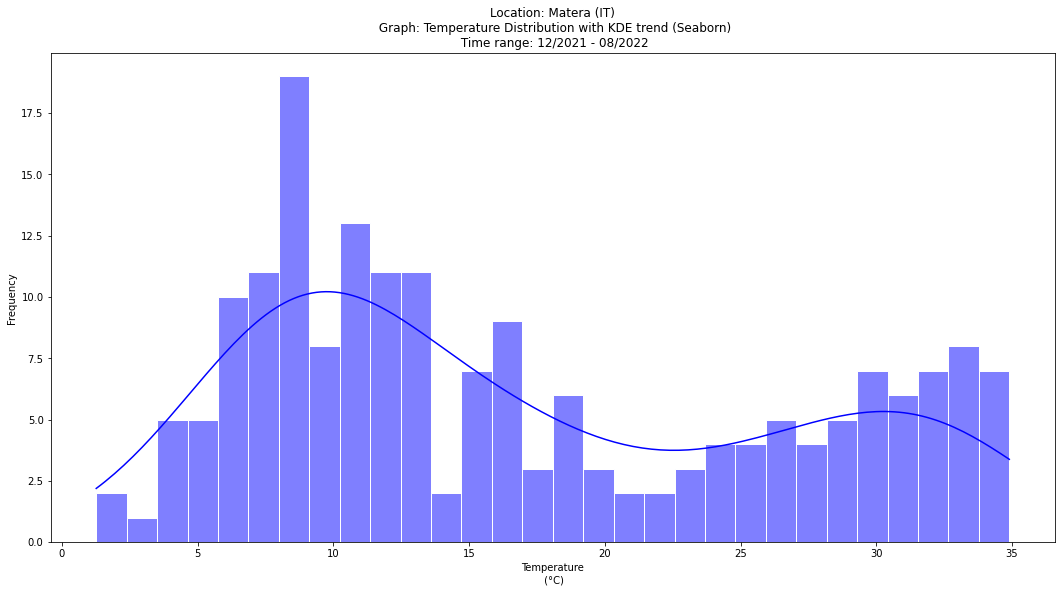

In [ ]:
import seaborn as sns

plt.figure(figsize=(18,9))
sns.histplot(df['TM'], #data
             bins=30, # bins
             kde=True, # Kernel Density Estimation
             edgecolor='white', # bar edges color
             color="blue" # bar color
             )
plt.title("Location: Matera (IT)\n Graph: Temperature Distribution with KDE trend (Seaborn)\n Time range: 12/2021 - 08/2022")
plt.xlabel("Temperature\n (°C)")
plt.ylabel("Frequency")
plt.show()

We can plot also other particular grapgh.\
For instance boxplots are useful for summarize the distribution of a variable and highlight outliers.

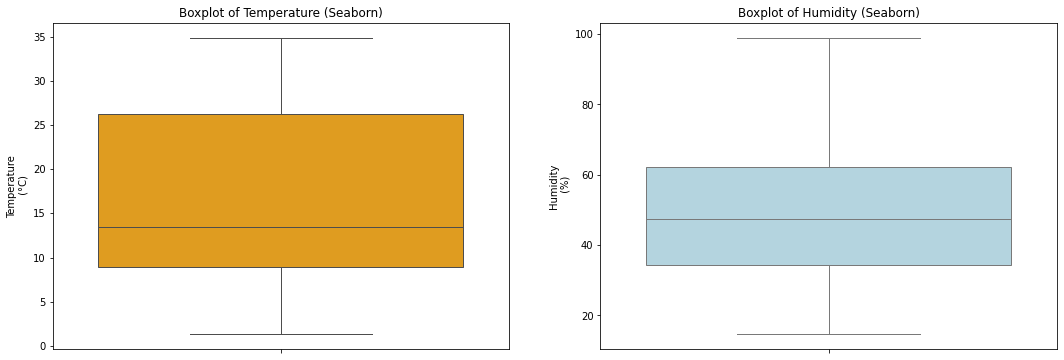

In [ ]:
### Seaborn - Box Plot of Temperature
#Box plots summarize the distribution of a variable and highlight outliers.

# Create a two side boxplot figure
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Temperature boxplot
sns.boxplot(y=df['TM'], color='orange', ax=axes[0])
axes[0].set_ylabel("Temperature\n (°C)")
axes[0].set_title("Boxplot of Temperature (Seaborn)")

# Umidity Boxplot
sns.boxplot(y=df['UM'], color='lightblue', ax=axes[1])
axes[1].set_ylabel("Humidity\n (%)")
axes[1].set_title("Boxplot of Humidity (Seaborn)")

plt.show()


Here is an example of a Climate Heatmap done again with `Seaborn` to show the variation of monthly average temperatures in different cities.\
For this example, we use some randomly generated temperature data for five Italian cities, to create a colored Heatmap with the average monthly temperatures.

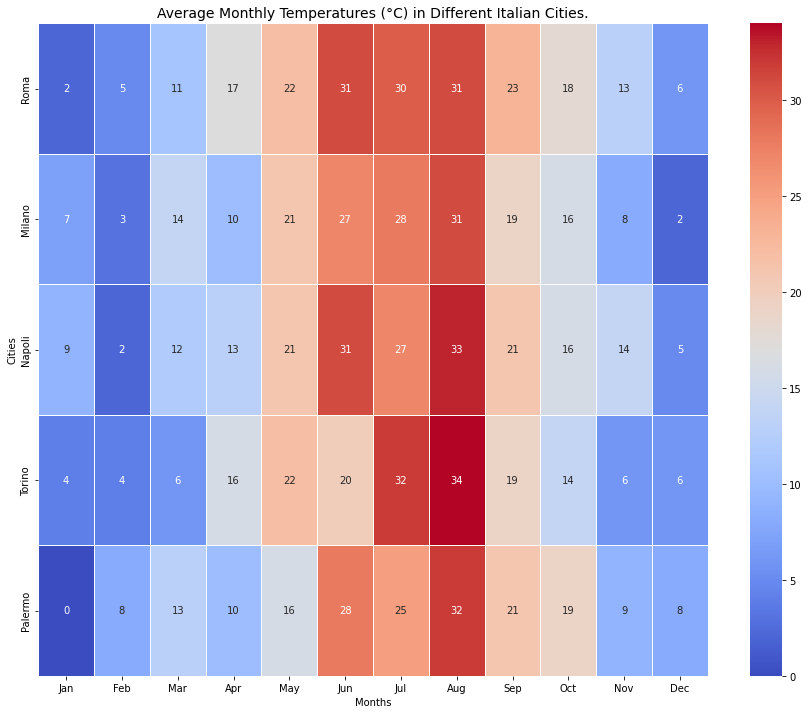

In [ ]:
# Generate random climate data (average monthly temperatures in different cities)
data = {
    'City': ['Roma', 'Milano', 'Napoli', 'Torino', 'Palermo'],
    'Jan': np.random.randint(0, 10, 5), # random T°C between 0 and 10, for 5 times as the number of the columns
    'Feb': np.random.randint(1, 12, 5),
    'Mar': np.random.randint(5, 18, 5),
    'Apr': np.random.randint(10, 22, 5),
    'May': np.random.randint(15, 28, 5),
    'Jun': np.random.randint(20, 33, 5),
    'Jul': np.random.randint(25, 37, 5),
    'Aug': np.random.randint(24, 36, 5),
    'Sep': np.random.randint(18, 30, 5),
    'Oct': np.random.randint(12, 22, 5),
    'Nov': np.random.randint(5, 15, 5),
    'Dec': np.random.randint(0, 10, 5)
}

# DataFrame creation
df = pd.DataFrame(data)
df.set_index('City', inplace=True)

# Heatmap Creation
plt.figure(figsize=(15, 12))
sns.heatmap(df, annot=True, cmap='coolwarm', linewidths=0.5, fmt="d") # fmt="d" sets the format as integer with no decimals

# Title and labels
plt.title('Average Monthly Temperatures (°C) in Different Italian Cities.', fontsize=14)
plt.ylabel('Cities')
plt.xlabel('Months')

plt.show()

## 2 - Rasterio for Raster Processing and Visualization

Now we'll explore `Rasterio`, a powerful Python library designed for efficient reading, writing, and processing of geospatial raster data.\
We will focus on raster processing, spatial filtering, and visualization techniques.

![Numpy](https://user-images.githubusercontent.com/53001455/226302342-f88b4bb8-7a4b-4888-abba-b330bd98e26f.png)

### Introduction

Rasterio simplifies handling various raster formats (e.g., GeoTIFF, jp2, VRT etc) by providing a user-friendly interface to interact with geospatial data.\
Its integration with other libraries (such as NumPy, SciPy, and Matplotlib) makes it a versatile tool in the field of remote sensing and geocomputation.\
In this lesson, we will:

- Learn how to read and inspect raster metadata.
- Explore manipulation techniques, including band extraction, spatial filtering (moving average, Sobel), and masking.
- Implement advanced visualization methods to generate false-color composites and perform side-by-side comparisons of original and filtered data.

### Reading and Inspecting Rasters

Raster data formats like GeoTIFF and VRT are staples in geospatial analysis. A GeoTIFF contains embedded georeferencing information, while a VRT (Virtual Raster) allows for flexible mosaicking and on-the-fly processing.\
Rasterio provides efficient access to these formats, letting you inspect metadata (dimensions, coordinate reference system, number of bands) and load raster data into NumPy arrays.

If `rasterio` or some of its features connected to `gdal` doesn't work, do again the installations with `pip` command:

            !pip show rasterio
            !apt show gdal-bin libgdal-dev
            !pip install rasterio
            !sudo apt update
            !sudo apt install gdal-bin libgdal-dev

If `Rasterio` is on, let's try to open a Sentinel-2 multispectral raster image, loading it and printing Raster Metadata and visualize all 3 RGB bands.\
In this case we will open all 3 RGB band .jp2 images, starting from Red.

Red Band (band 04) is useful for identifying vegetation types, soils and urban (city and town) areas because it is strongly reflected by dead foliage.\
It has limited water penetration and doesn’t reflect well from live foliage with chlorophyll.

ERROR 1: Output dataset files/S2B_MSIL2A_20250309T094039_N0511_R036_T34TBK_20250309T120119.SAFE/GRANULE/L2A_T34TBK_A041818_20250309T094257/IMG_DATA/R10m/T34TBK_20250309T094039_B04_100m.jp2 exists,
but some command line options were provided indicating a new dataset
should be created.  Please delete existing dataset and run again.

ERROR 1: Output dataset files/S2B_MSIL2A_20250309T094039_N0511_R036_T34TBK_20250309T120119.SAFE/GRANULE/L2A_T34TBK_A041818_20250309T094257/IMG_DATA/R10m/T34TBK_20250309T094039_B03_100m.jp2 exists,
but some command line options were provided indicating a new dataset
should be created.  Please delete existing dataset and run again.

ERROR 1: Output dataset files/S2B_MSIL2A_20250309T094039_N0511_R036_T34TBK_20250309T120119.SAFE/GRANULE/L2A_T34TBK_A041818_20250309T094257/IMG_DATA/R10m/T34TBK_20250309T094039_B02_100m.jp2 exists,
but some command line options were provided indicating a new dataset
should be created.  Please delete existing dataset and run again.

E

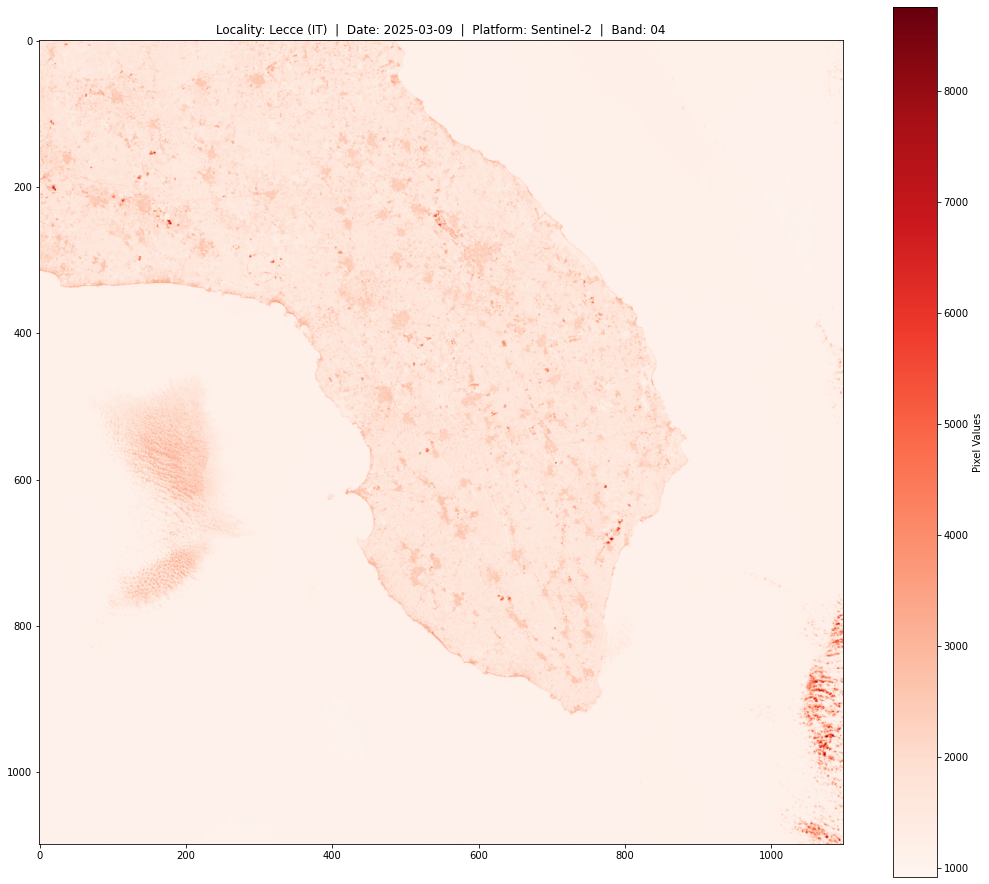

In [ ]:
# Import necessary libraries
import os
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Load the Sentinel2 jp2 image files
# ------------------------------------------------------------------------------
S2root = 'files/S2B_MSIL2A_20250309T094039_N0511_R036_T34TBK_20250309T120119.SAFE/GRANULE/L2A_T34TBK_A041818_20250309T094257/IMG_DATA/R10m/'
# ------------------------------------------------------------------------------
Band_04_file = f"{S2root}T34TBK_20250309T094039_B04_10m.jp2" # red 10m
!gdalwarp -tr 100 100 -r bilinear files/S2B_MSIL2A_20250309T094039_N0511_R036_T34TBK_20250309T120119.SAFE/GRANULE/L2A_T34TBK_A041818_20250309T094257/IMG_DATA/R10m/T34TBK_20250309T094039_B04_10m.jp2 files/S2B_MSIL2A_20250309T094039_N0511_R036_T34TBK_20250309T120119.SAFE/GRANULE/L2A_T34TBK_A041818_20250309T094257/IMG_DATA/R10m/T34TBK_20250309T094039_B04_100m.jp2
Band_04_file_100 = f"{S2root}T34TBK_20250309T094039_B04_100m.jp2" # red 100m (for low memory plotting)
# ------------------------------------------------------------------------------
Band_03_file = f"{S2root}T34TBK_20250309T094039_B03_10m.jp2" # green 10m
!gdalwarp -tr 100 100 -r bilinear files/S2B_MSIL2A_20250309T094039_N0511_R036_T34TBK_20250309T120119.SAFE/GRANULE/L2A_T34TBK_A041818_20250309T094257/IMG_DATA/R10m/T34TBK_20250309T094039_B03_10m.jp2 files/S2B_MSIL2A_20250309T094039_N0511_R036_T34TBK_20250309T120119.SAFE/GRANULE/L2A_T34TBK_A041818_20250309T094257/IMG_DATA/R10m/T34TBK_20250309T094039_B03_100m.jp2
Band_03_file_100 = f"{S2root}T34TBK_20250309T094039_B03_100m.jp2" # green 100m (for low memory plotting)
# ------------------------------------------------------------------------------
Band_02_file = f"{S2root}T34TBK_20250309T094039_B02_10m.jp2" # blue
!gdalwarp -tr 100 100 -r bilinear files/S2B_MSIL2A_20250309T094039_N0511_R036_T34TBK_20250309T120119.SAFE/GRANULE/L2A_T34TBK_A041818_20250309T094257/IMG_DATA/R10m/T34TBK_20250309T094039_B02_10m.jp2 files/S2B_MSIL2A_20250309T094039_N0511_R036_T34TBK_20250309T120119.SAFE/GRANULE/L2A_T34TBK_A041818_20250309T094257/IMG_DATA/R10m/T34TBK_20250309T094039_B02_100m.jp2
Band_02_file_100 = f"{S2root}T34TBK_20250309T094039_B02_100m.jp2" # blue 100m (for low memory plotting)
# ------------------------------------------------------------------------------
Band_08_file = f"{S2root}T34TBK_20250309T094039_B08_10m.jp2" # NIR
!gdalwarp -tr 100 100 -r bilinear files/S2B_MSIL2A_20250309T094039_N0511_R036_T34TBK_20250309T120119.SAFE/GRANULE/L2A_T34TBK_A041818_20250309T094257/IMG_DATA/R10m/T34TBK_20250309T094039_B08_10m.jp2 files/S2B_MSIL2A_20250309T094039_N0511_R036_T34TBK_20250309T120119.SAFE/GRANULE/L2A_T34TBK_A041818_20250309T094257/IMG_DATA/R10m/T34TBK_20250309T094039_B08_100m.jp2
Band_08_file_100 = f"{S2root}T34TBK_20250309T094039_B08_100m.jp2" # NIR 100m (for low memory plotting)
# ------------------------------------------------------------------------------
RGB_file = f"{S2root}T34TBK_20250309T094039_TCI_10m.jp2"
!gdalwarp -tr 100 100 -r bilinear files/S2B_MSIL2A_20250309T094039_N0511_R036_T34TBK_20250309T120119.SAFE/GRANULE/L2A_T34TBK_A041818_20250309T094257/IMG_DATA/R10m/T34TBK_20250309T094039_TCI_10m.jp2 files/S2B_MSIL2A_20250309T094039_N0511_R036_T34TBK_20250309T120119.SAFE/GRANULE/L2A_T34TBK_A041818_20250309T094257/IMG_DATA/R10m/T34TBK_20250309T094039_TCI_100m.jp2
RGB_file_100 = f"{S2root}T34TBK_20250309T094039_TCI_100m.jp2" # RGB 100m (for low memory plotting)
# ------------------------------------------------------------------------------

###### Should the kernel crash during plotting, change the raster to be plotted from the 10m resolution version '*_10.jp2' to the downscaled 100m version '*_100.jp2' to avoid the memory-related problem.

print(f"\n\
RED BAND SPECS:\n\
band: B04 - red\n\
Resolution = 10m/px\n\
Central Wavelength = 665nm\n\
Bandwidth = 30nm \n\
")

# Open the raster file and inspect its metadata
with rasterio.open(Band_04_file_100) as src:
    # Display metadata information
    print("Metadata:")
    print(src.meta)

    # Display number of bands and raster dimensions
    print("Number of bands:", src.count)
    print("Dimensions:", src.width, "x", src.height)

    # Read and display the first band (for visualization)
    band1 = src.read(1)
    plt.figure(figsize=(18, 16))
    plt.title(f"Locality: Lecce (IT)  |  Date: 2025-03-09  |  Platform: Sentinel-2  |  Band: 04")
    plt.imshow(band1, cmap='Reds')
    plt.colorbar(label='Pixel Values')
    plt.show()


Green band (band 03) gives an excellent contrast between clear and turbid (muddy) water, and penetrates clear water fairly well. It helps in highlighting oil on water surfaces, and vegetation. It reflects green light stronger than any other visible color. Man-made features are still visible.


GREEN BAND SPECS:
band: B03 - green
Resolution = 10m/px
Central Wavelength = 600nm
Bandwidth = 36nm 

Metadata:
{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 1098, 'height': 1098, 'count': 1, 'crs': CRS.from_epsg(32634), 'transform': Affine(100.0, 0.0, 199980.0,
       0.0, -100.0, 4500000.0)}
Number of bands: 1
Dimensions: 1098 x 1098


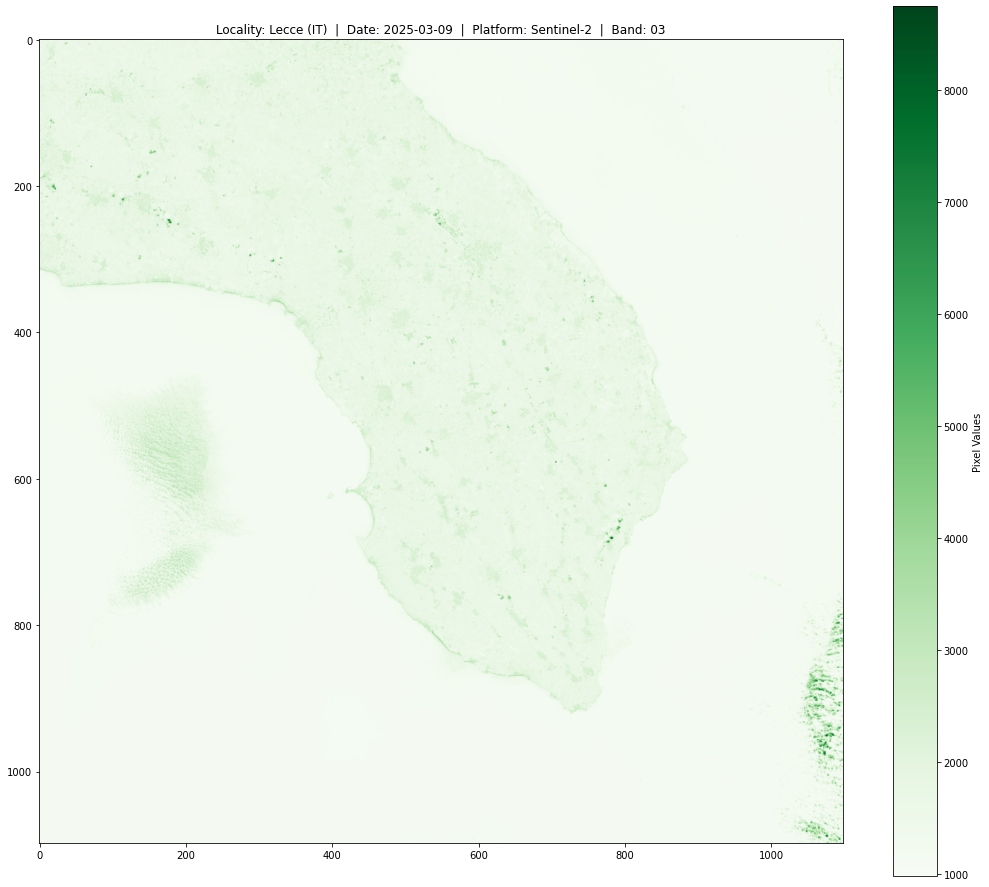

In [ ]:
print(f"\n\
GREEN BAND SPECS:\n\
band: B03 - green\n\
Resolution = 10m/px\n\
Central Wavelength = 600nm\n\
Bandwidth = 36nm \n\
")

# Open the raster file and inspect its metadata
with rasterio.open(Band_03_file_100) as src:
    # Display metadata information
    print("Metadata:")
    print(src.meta)

    # Display number of bands and raster dimensions
    print("Number of bands:", src.count)
    print("Dimensions:", src.width, "x", src.height)

    # Read and display the first band (for visualization)
    band1 = src.read(1)
    plt.figure(figsize=(18, 16))
    plt.title(f"Locality: Lecce (IT)  |  Date: 2025-03-09  |  Platform: Sentinel-2  |  Band: 03")
    plt.imshow(band1, cmap='Greens')
    plt.colorbar(label='Pixel Values')
    plt.show()

Blue Band (band 02) is useful for soil and vegetation discrimination, forest type mapping and identifying man-made features. It is scattered by the atmosphere, it illuminates material in shadows better than longer wavelengths, and it penetrates clear water better than other colors. It is absorbed by chlorophyll, which results in darker plants.


BLUE BAND SPECS:
band: B02 - blue
Resolution = 10m/px
Central Wavelength = 492nm
Bandwidth = 66nm 

Metadata:
{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 1098, 'height': 1098, 'count': 1, 'crs': CRS.from_epsg(32634), 'transform': Affine(100.0, 0.0, 199980.0,
       0.0, -100.0, 4500000.0)}
Number of bands: 1
Dimensions: 1098 x 1098


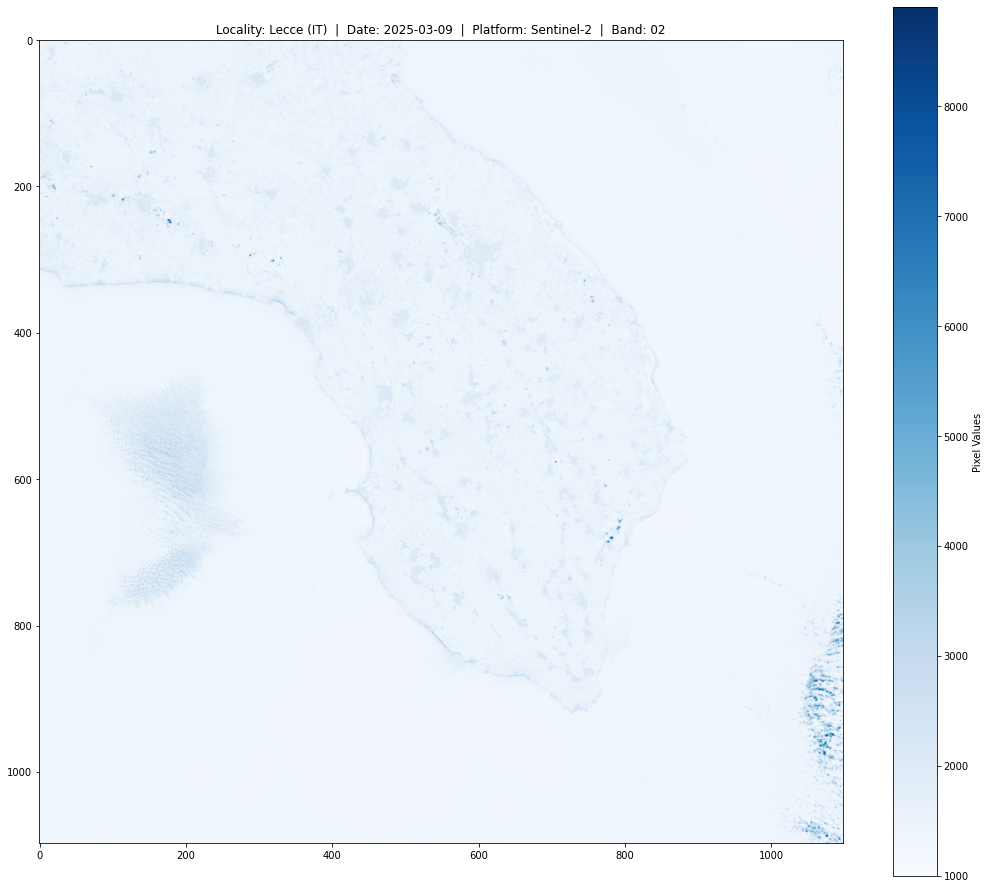

In [ ]:
print(f"\n\
BLUE BAND SPECS:\n\
band: B02 - blue\n\
Resolution = 10m/px\n\
Central Wavelength = 492nm\n\
Bandwidth = 66nm \n\
")

# Open the raster file and inspect its metadata
with rasterio.open(Band_02_file_100) as src:
    # Display metadata information
    print("Metadata:")
    print(src.meta)

    # Display number of bands and raster dimensions
    print("Number of bands:", src.count)
    print("Dimensions:", src.width, "x", src.height)

    # Read and display the first band (for visualization)
    band1 = src.read(1)
    plt.figure(figsize=(18, 16))
    plt.title(f"Locality: Lecce (IT)  |  Date: 2025-03-09  |  Platform: Sentinel-2  |  Band: 02")
    plt.imshow(band1, cmap='Blues')
    plt.colorbar(label='Pixel Values')
    plt.show()

In the same way we can display the RGB multiband image


RGB IMAGE SPECS:
Resolution = 10m/px

Metadata:
{'driver': 'JP2OpenJPEG', 'dtype': 'uint8', 'nodata': None, 'width': 1098, 'height': 1098, 'count': 3, 'crs': CRS.from_epsg(32634), 'transform': Affine(100.0, 0.0, 199980.0,
       0.0, -100.0, 4500000.0)}
Number of bands: 3
Dimensions: 1098 x 1098


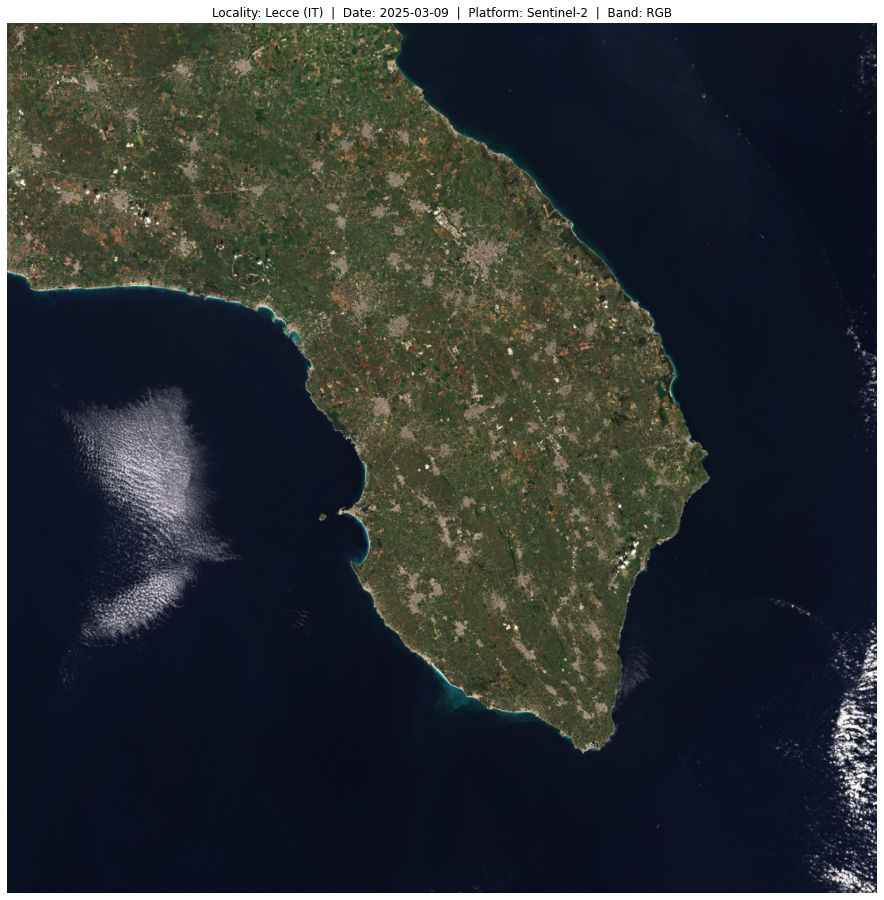

In [ ]:
import rasterio
import numpy as np

print(f"\n\
RGB IMAGE SPECS:\n\
Resolution = 10m/px\n\
")

# Open the raster file and inspect its metadata
with rasterio.open(RGB_file_100) as src:
    rgb_image = src.read()

    # Display metadata information
    print("Metadata:")
    print(src.meta)

    # Display number of bands and raster dimensions
    print("Number of bands:", src.count)
    print("Dimensions:", src.width, "x", src.height)

    # Display the RGB image
    plt.figure(figsize=(18, 16))
    plt.title("Locality: Lecce (IT)  |  Date: 2025-03-09  |  Platform: Sentinel-2  |  Band: RGB")

    # Converts array to (height, width, band) for imshow()
    plt.imshow(np.moveaxis(rgb_image, 0, -1))
    plt.axis("off")
    plt.show()

Often in satellite geospatial analyses, the study focus on one or more specific areas.\
Therefore, it is necessary to know how to crop the image to the right portion needed for the case study, to avoid both overcomputing operations (often costly in terms of time, memory and energy) and loss of detail.\
For instance, in this case we focus on the coastal area of the “Le Cesine” Nature Reserve, so we will use a common **crop polygon** shapefile for the **crop** operation.\
For this example instead of using a pre-existing shape we created it using [Map Polygon-Polyline tool](https://www.keene.edu/campus/maps/tool/), a crude but simple, practical and fast web tool.
Therefore we will see in advance the `geopandas` tool in action along with the use of `geometry_mask` from `rasterio`.

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon

# Definition of the area of "Riserva Naturale Le Cesine"
# CRS: EPSG:4326
# just 4 vertexes (lat/long) listed clockwise starting from the lower left, to create a simple rectangular-ish bounding box

bounding_box = [
    (18.3238220, 40.3897044), # LL
    (18.2901764, 40.3677353), # LR
    (18.3571243, 40.3208965), # UL
    (18.3900833, 40.3460208), # UR
    (18.3238220, 40.3897044), # polygon closing
    ]
polygon = Polygon(bounding_box)

# The polygon needs to be setted as EPSG:4326 → Geographic coordinates (lat/long in decimal degrees).
# then converted in EPSG:32634 → Projected coordinates (meters, necessary to align and match with Sentinel2 CRS).

gdf = gpd.GeoDataFrame({'geometry': [polygon]}, crs='EPSG:4326')
gdf = gdf.to_crs('EPSG:32634')

# Save the polygon as shapefile
bbox_path = 'files/Polygon_Natural_Reserve_Le_Cesine/Le_Cesine_BBox.shp'
gdf.to_file(bbox_path)

Now we can procede to cropping operation

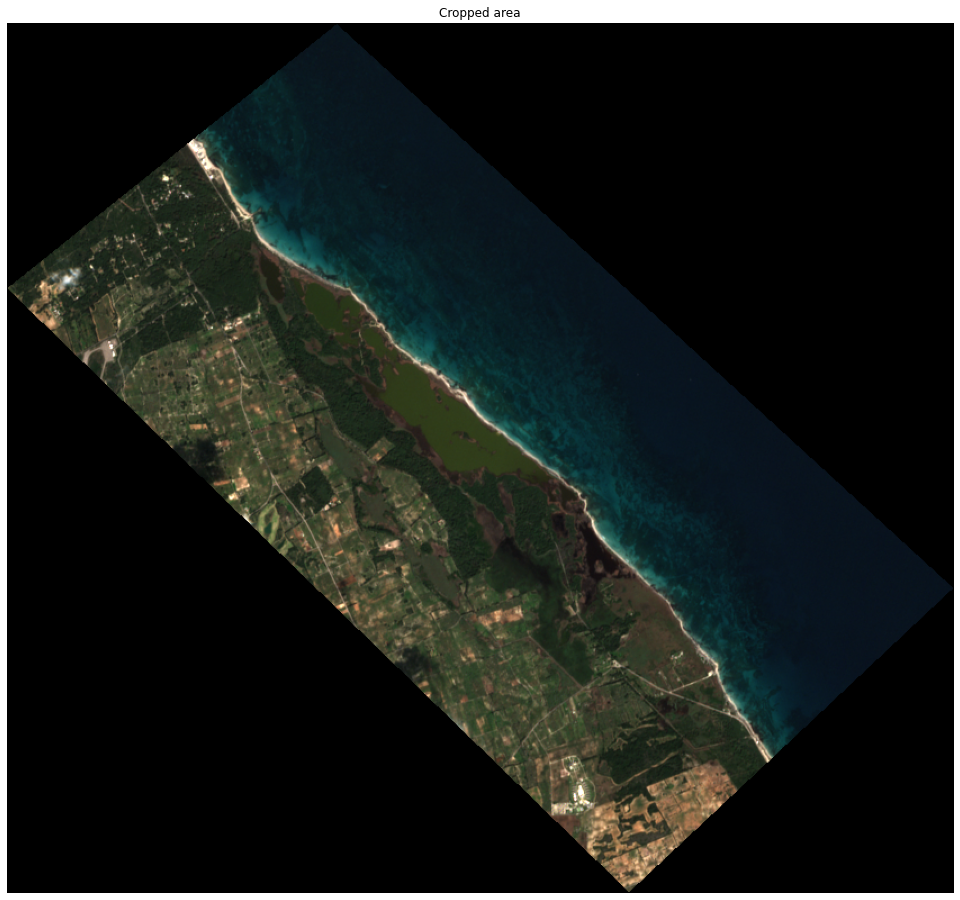

In [ ]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from rasterio.mask import mask

# Load the bounding box
bbox_gdf = gpd.read_file(bbox_path)

# Double check images have the same CRS
with rasterio.open(RGB_file) as src:
    if bbox_gdf.crs != src.crs:
        bbox_gdf = bbox_gdf.to_crs(src.crs)

    # Extract bounding box geometry
    bbox_geom = [bbox_gdf.geometry.unary_union] #return the union of multple geometries if any

    # Apply the crop using the mask
    cropped_image, cropped_transform = mask(src, bbox_geom, crop=True, nodata=0) # if you want a white backgound in the print set ', nodata=255'

    # Update the metadata for the cropped image
    cropped_meta = src.meta.copy()
    cropped_meta.update({
        "height": cropped_image.shape[1],
        "width": cropped_image.shape[2],
        "transform": cropped_transform
    })

# Save the cropped image
cropped_path = 'files/Lecce_RGB_cropped.tif'
with rasterio.open(cropped_path, 'w', **cropped_meta) as dst:
    dst.write(cropped_image)

# Visualize a small preview of the cropped image
plt.figure(figsize=(18, 16))
plt.title("Cropped area")
plt.imshow(np.moveaxis(cropped_image, 0, -1))
plt.axis("off")
plt.show()

We can also visualize it in a more scientific/fancy way!

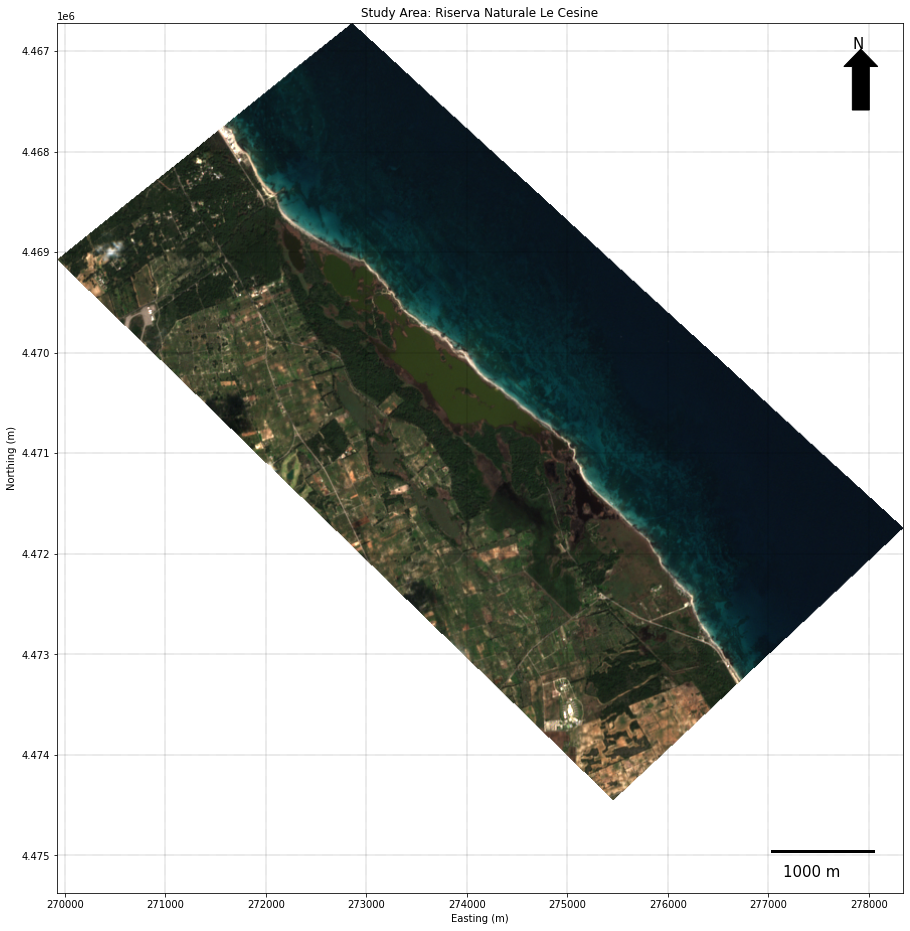

In [ ]:
from matplotlib.patches import FancyArrow

# Extract spatial information
left, bottom = cropped_transform * (0, 0)
right, top = cropped_transform * (cropped_image.shape[2], cropped_image.shape[1])

# Display the cropped image with map features
fig, ax = plt.subplots(figsize=(18, 16))
plt.title("Study Area: Riserva Naturale Le Cesine")

# Show image coordinates and white background for NoData
ax.imshow(np.moveaxis(cropped_image, 0, -1), extent=(left, right, bottom, top))

# Add coordinate axes
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")

# Add a north arrow
arrow = FancyArrow(0.95, 0.90, 0, 0.05, transform=ax.transAxes,
                   color="black", width=0.02, head_width=0.04, head_length=0.02)
ax.add_patch(arrow)
ax.text(0.94, 0.97, 'N', transform=ax.transAxes, fontsize=15, color='black')

# Add a scale bar
scalebar_length = 1000  # meters
ax.plot([right - 1300, right - 300], [bottom + 500, bottom + 500], color='black', linewidth=3)
ax.text(right - 1200, bottom + 750, f"{scalebar_length} m", fontsize=15)

plt.grid(visible=True, linestyle=':', linewidth=0.4, color='black')  # Add grid for better readability
plt.show()



We can also explore the cropped image using `rasterio` and `matplotlib`, by plotting the distribution of the pixel values for each band.\
This becomes useful when we have to indagate pixel diversity to find some clustering or some outlier values.

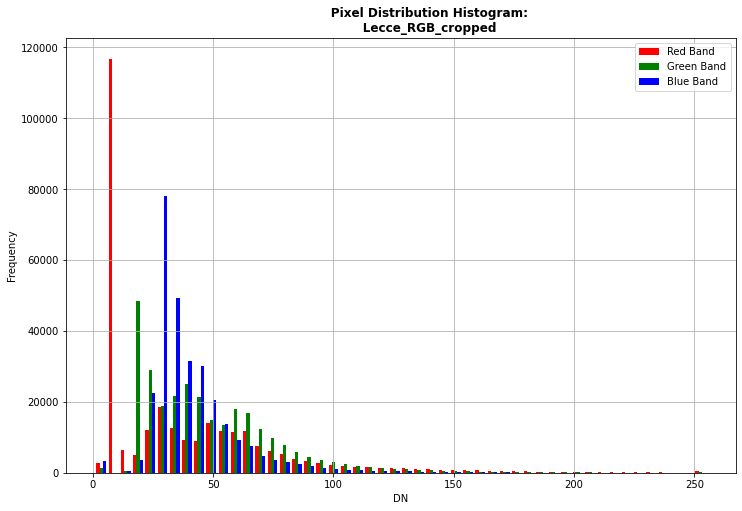

In [ ]:
import rasterio
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
import numpy as np


with rasterio.open('files/Lecce_RGB_cropped.tif') as src:
    plt.figure(figsize=(12, 8))
    # Empty brackets for reading all bands
    data = src.read()

    # for a better representation all nodata '0' values needs to be masked-out
    data_masked = np.ma.masked_equal(data, 0)

    # Show plot
    band_labels = ['Red Band', 'Green Band', 'Blue Band']
    show_hist(data_masked, bins=50, lw=0.5, label=band_labels,
              title="\
              Pixel Distribution Histogram:\n\
              Lecce_RGB_cropped")
    plt.show()

### Raster Manipulation and Filtering

Spatial filtering is crucial for enhancing feature detection, noise suppression, edge detection and many others more noise in raster imges.\
`Rasterio` allows you to extract individual bands from multi-band images, process these bands with tools and libraries such as `SciPy`, and save the modified outputs back to a new raster file.
In this example we will extract bands to apply a Sobel Filter to our cropper study area.\
For instance, we can try applying a **Sobel filter**, to highlight coastline then visually compare it with the original cropped RGB image and save the processed result.\
Specifically, the **Sobel operator** is an algorithm used to process digital images, particularly to perform contour recognition.\
Technically speaking, it is a differential operator, which calculates an approximate value of the gradient of a function representing the brightness of the image.

In [ ]:
!pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable


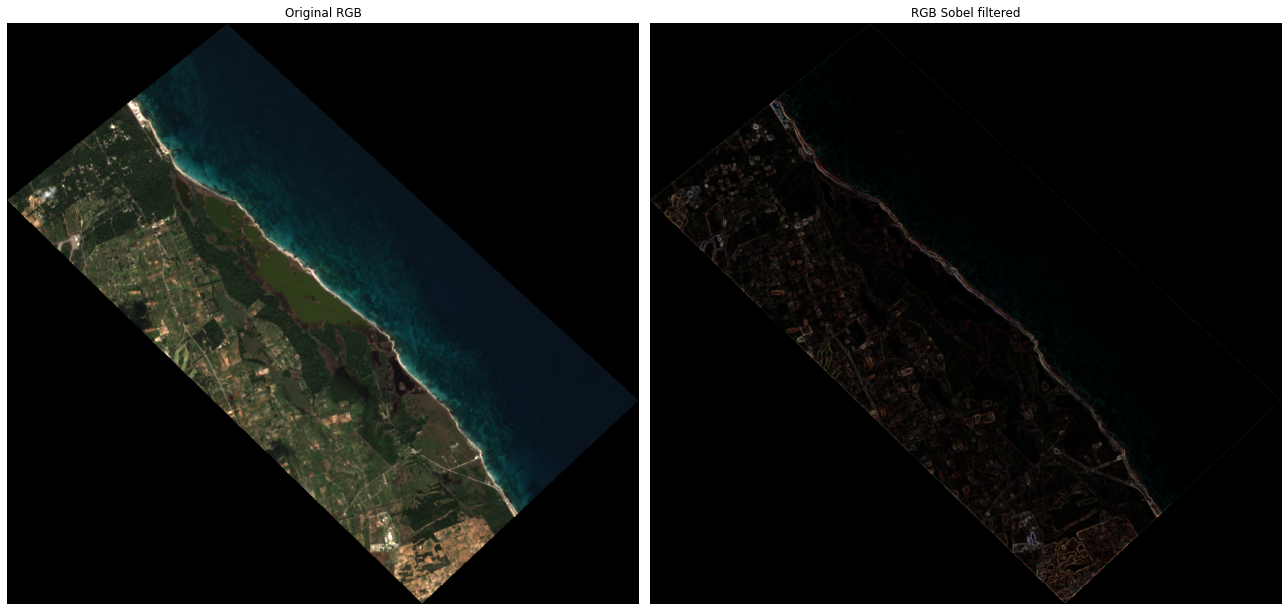

In [ ]:
import numpy as np
import rasterio
from skimage import filters
import matplotlib.pyplot as plt

rgb_path = 'files/Lecce_RGB_cropped.tif'
with rasterio.open(rgb_path) as src:
    img_data = src.read([1, 2, 3])  # Read all R, G, B
    # Read all values but masks out all '0' NoData values to avoid misfiltering
    nodata_value = src.nodata if src.nodata is not None else 0
    valid_mask = img_data != nodata_value
    # Create a copy of original values to apply Sobel only on valid pixels
    sobel_filtered = np.zeros_like(img_data)

    # Loop on all RGB bands and apply Sobel filtering on valid pixels only
    for i in range(3):
        sobel_filtered[i] = filters.sobel(img_data[i].astype(np.float32))

    # Converts the pixel value to uint8 in order to save as a properly viewable image
    # and Restores the original NoData values to the corresponding pixels
    sobel_filtered = sobel_filtered.astype(np.uint8)
    sobel_filtered[~valid_mask] = nodata_value

    # Saving the filtered image
    sobel_path = rgb_path.replace('.tif', '_sobel.tif')
    width = src.width     # image width
    height = src.height   # image height
    with rasterio.open(sobel_path, 'w', driver='GTiff', count=3, dtype='uint8',
                       crs=src.crs, transform=src.transform, nodata=nodata_value,
                       width=width, height=height) as dest:
        dest.write(sobel_filtered)

# Display of the original compared with the filtered one
fig, axes = plt.subplots(1, 2, figsize=(18, 16))

# Original image
with rasterio.open(rgb_path) as src:
    original_img = src.read([1, 2, 3]).transpose(1, 2, 0)
axes[0].imshow(original_img)
axes[0].set_title('Original RGB')
axes[0].axis('off')

# Filtered image
with rasterio.open(sobel_path) as src:
    sobel_img = src.read([1, 2, 3]).transpose(1, 2, 0)
axes[1].imshow(sobel_img)
axes[1].set_title('RGB Sobel filtered')
axes[1].axis('off')

plt.tight_layout()
plt.show()


There other useful filtering and methods for processing an image.\
For example, again using `SciPy` we find the Otsu method, a binary thresholding algorithm.\
The Otsu method is an automatic histogram thresholding method in digital images. The algorithm assumes that there are only two classes in the image to be thresholded, and then calculates the optimal threshold for separating these two classes by minimizing the intra-class variance.\
Let's see how to apply it, and compare it to the original.

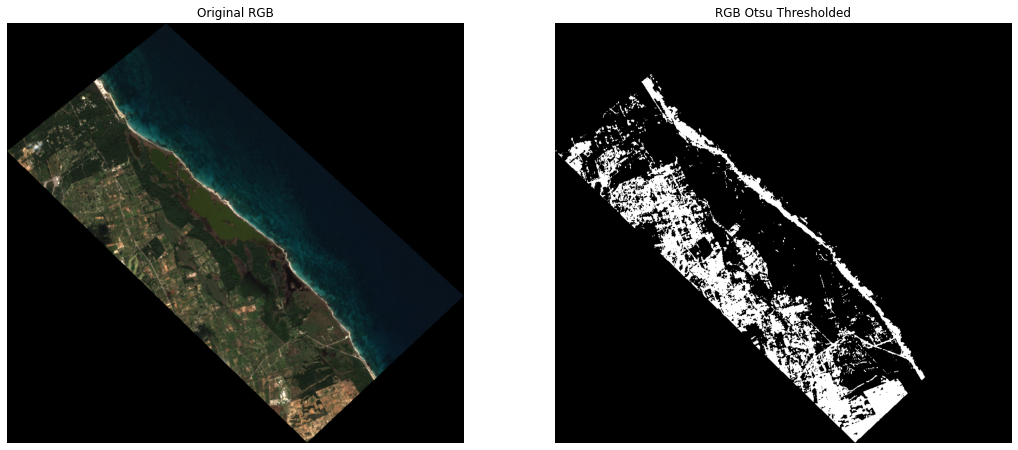

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters


with rasterio.open(rgb_path) as src:
    rgb_image = src.read()  # Array shape: (3, height, width)
    meta = src.meta.copy()

# Mask out all NoData values (values = 0)
valid_mask = np.all(rgb_image != 0, axis=0)

# Convert the RGB image to grayscale (mean of valid pixels)
gray_image = np.mean(rgb_image, axis=0)

# Apply the mask to exclude NoData values
valid_gray_image = gray_image[valid_mask]

# Compute Otsu's threshold excluding NoData
otsu_threshold = filters.threshold_otsu(valid_gray_image)

# Apply the threshold to create a binary mask
binary_mask = (gray_image > otsu_threshold).astype(np.uint8) * 255

# Preserve NoData regions (set them to 0 in the output mask)
binary_mask[~valid_mask] = 0

# Update metadata for the binary image
meta.update({
    'dtype': 'uint8',
    'count': 1
})

# Save the binary mask with Otsu's threshold
otsu_output_path = 'files/Lecce_RGB_cropped_otsu.tif'
with rasterio.open(otsu_output_path, 'w', **meta) as dst:
    dst.write(binary_mask, 1)

# Display of the original compared with the binary one
plt.figure(figsize=(18, 16))

# Original image
plt.subplot(1, 2, 1)
plt.title("Original RGB")
plt.imshow(np.moveaxis(rgb_image, 0, -1))
plt.axis("off")

# Thresholded image
plt.subplot(1, 2, 2)
plt.title("RGB Otsu Thresholded")
plt.imshow(binary_mask, cmap='gray')
plt.axis("off")

plt.show()

### Composite Raster Processing

In addition to viewing, editing, and filtering rasters, rasterio allows you to create composites by processing.\
Now we will see a complete workflow for creating a composite raster using `Rasterio`, with a focus on calculating the **Normalized Difference Vegetation Index (NDVI)**.\
NDVI is one of the many widely used indexes in remote sensing that helps quantify some physical properties, in this case it express the vegetation health by comparing the near-infrared (NIR) and red spectral bands.

We will open the two .jp2 Red (04) and NIR (08) spectral band files and compute the NDVI for the entire raster area.\
The NDVI is calculated with the formula:

$$
 \text{NDVI} = \frac{\text{NIR} - \text{Red}}{\text{NIR} + \text{Red}}
$$



NDVI calculation complete
shape: (10980, 10980)
resolution: 10m/px

ERROR 1: Output dataset files/Lecce_NDVI_resized.tif exists,
but some command line options were provided indicating a new dataset
should be created.  Please delete existing dataset and run again.



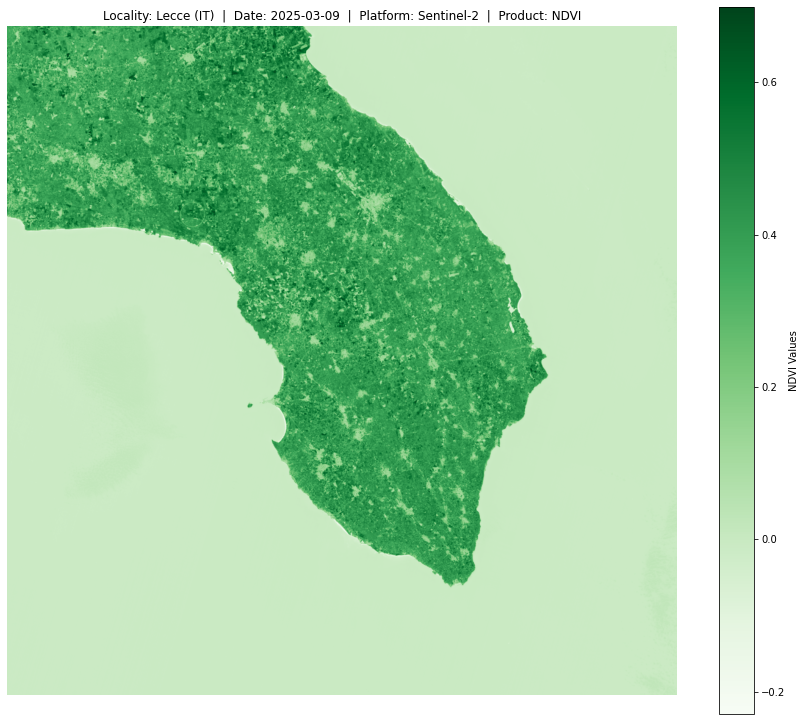

In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Define the Sentinel-2 data root folder and file paths for the red and NIR bands.
S2root = 'files/S2B_MSIL2A_20250309T094039_N0511_R036_T34TBK_20250309T120119.SAFE/GRANULE/L2A_T34TBK_A041818_20250309T094257/IMG_DATA/R10m/'
Band_04_file = f"{S2root}T34TBK_20250309T094039_B04_10m.jp2"
Band_08_file = f"{S2root}T34TBK_20250309T094039_B08_10m.jp2"

# Open the red band file (Band 04) and read its data.
with rasterio.open(Band_04_file) as red_src:
    red = red_src.read(1).astype('float32')
    # Save metadata for later use (for saving the final NDVI image).
    meta = red_src.meta.copy()

# Open the NIR band file (Band 08) and read its data.
with rasterio.open(Band_08_file) as nir_src:
    nir = nir_src.read(1).astype('float32')

# Calculate NDVI using the formula: (NIR - Red) / (NIR + Red)
# np.errstate is used to ignore division warnings (e.g., division by zero).
with np.errstate(divide='ignore', invalid='ignore'):
    ndvi = (nir - red) / (nir + red)
    ndvi = np.nan_to_num(ndvi, nan=0.0)  # Replace NaN values with 0.0

# Print basic information about the NDVI array.
print(f"\nNDVI calculation complete\nshape: {ndvi.shape}\nresolution: 10m/px\n")

# Update the metadata for the NDVI file.
meta.update({
    "driver": "GTiff",  # GeoTIFF format.
    "dtype": 'float32', # Data type.
    "count": 1          # Single band.
})

# Write the NDVI array to a new GeoTIFF file.
ndvi_file = "files/Lecce_NDVI.tif"
with rasterio.open(ndvi_file, 'w', **meta) as dst:
    dst.write(ndvi, 1)

# ---------------------------- Downscale for memory problem-----------------------------
!gdalwarp -tr 100 100 -r bilinear files/Lecce_NDVI.tif files/Lecce_NDVI_resized.tif
ndvi_file_resized= "files/Lecce_NDVI_resized.tif" # green 100m (for low memory plotting)
# --------------------------------------------------------------------------------------

# Now, open the newly created NDVI GeoTIFF file and visualize it.
with rasterio.open(ndvi_file_resized) as src:
    band1 = src.read(1)
    plt.figure(figsize=(15, 13))
    plt.title("Locality: Lecce (IT)  |  Date: 2025-03-09  |  Platform: Sentinel-2  |  Product: NDVI")
    plt.imshow(band1, cmap='Greens')
    plt.colorbar(label='NDVI Values')
    plt.axis('off')
    plt.show()


Another common and important practice in geospatial analysis is the image scaling process, which consists on adjusting the spatial resolution of raster data.\
We can do it with `Rasterio` running `GDAL` in the backbone.\
This involves **upscaling** (increasing image size) or **downscaling** (reducing image size).\
Resizing is indeed is a crucial step in many workflows involving raster data, such as satellite imagery, digital elevation models (DEMs) and other geospatial datasets.\
Especially working in cloud, for example in-flight downsizing allows us to download very light-weighted low-resolution previews to essay whether the whole processing is correct.

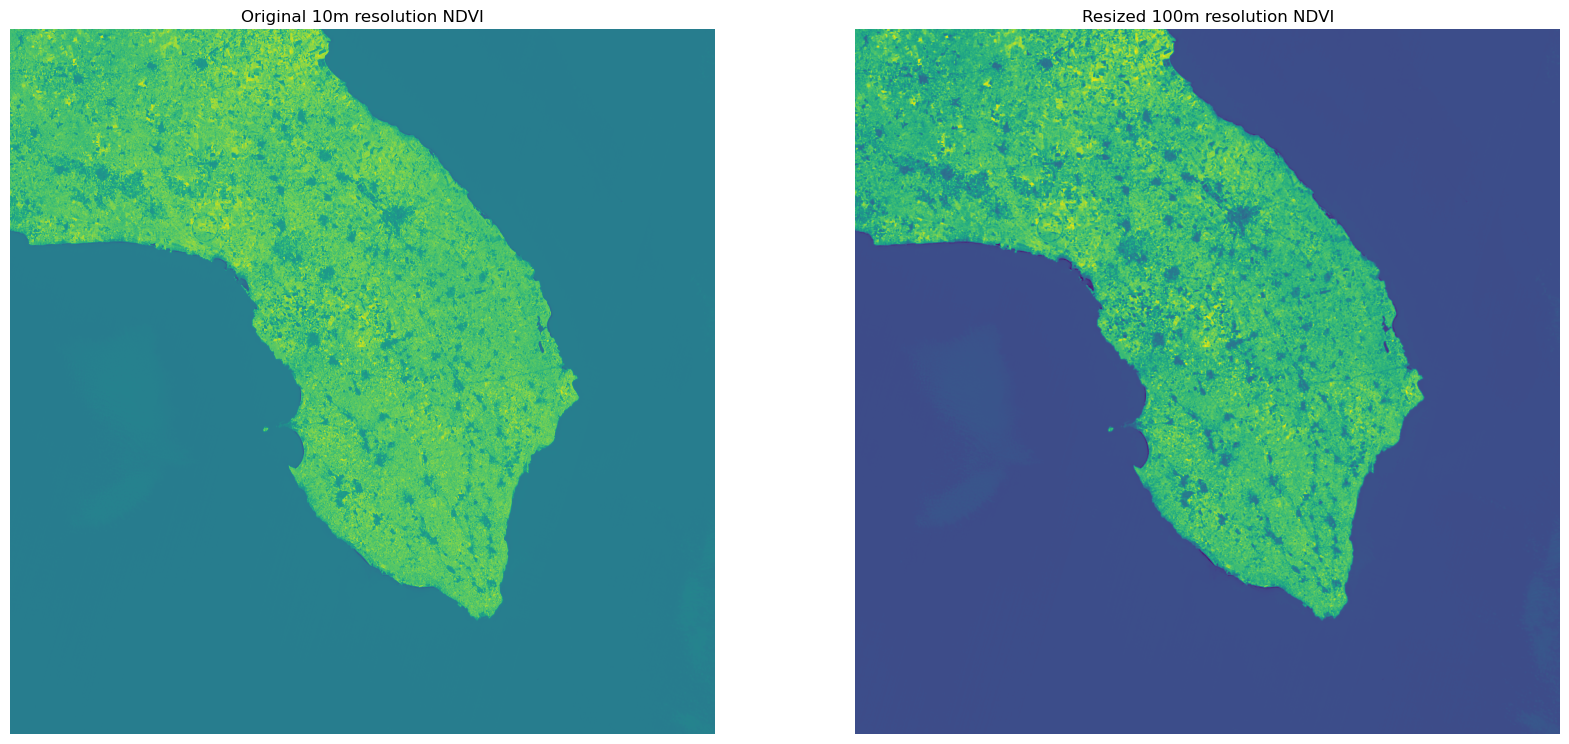

In [ ]:
import rasterio
from rasterio.enums import Resampling
import matplotlib.pyplot as plt

### Files paths
input_path = "files/Lecce_NDVI.tif"
output_tif = "files/Lecce_NDVI_resized.tif"

### View the comparison between the original raster and the resized raster
with rasterio.open(input_path) as original, rasterio.open(output_tif) as resized:
    fig, axes = plt.subplots(1, 2, figsize=(20, 18))

    axes[0].imshow(original.read(1), cmap='viridis')
    axes[0].set_title("Original 10m resolution NDVI")
    axes[0].axis('off')

    axes[1].imshow(resized.read(1), cmap='viridis')
    axes[1].set_title(f"Resized 100m resolution NDVI")
    axes[1].axis('off')

    plt.show()


## 3 - Geopandas for Vector Processing and Visualization

### Introduction to Vector Files and Their Types

Vector files are a common type of spatial data format used to represent geographic features such as points, lines, and polygons.\
They are different from raster files, which store data in a grid-like format. Vector data is essential for representing discrete objects in a map and is widely used for tasks like geospatial analysis and visualization.

The main types of vector files include:

- Point: Represents a specific location, e.g., a city or a landmark.
- Line: Represents linear features, e.g., roads or rivers.
- Polygon: Represents area-based features, e.g., countries, lakes, or forest boundaries.

`Geopandas` is a powerful Python library for working with vector data, allowing you to import, process, and visualize vector files.

![Geopandas](https://geopandas.org/en/stable/_images/geopandas_logo.png)

### Importing Vector Files with Geopandas

To begin working with vector files, we need to import them into a `Geopandas` DataFrame.\
`Geopandas` supports various file formats like Shapefiles, GeoJSON, and others.\
After reading the shapefile usually its a good practice to examine it by viewing the first few rows of its attribute table.

In [1]:
import geopandas as gpd

# Load a shapefile into a GeoDataFrame
shp = gpd.read_file('files/confini_comunali_Puglia/ConfiniComunali.shp')

# Display the first few rows
shp.head()


PERIMETER  COD_ISTAT             NOME_COM    ISTAT  COD_REG  COD_PRO  \
0  23908.747701   16073016            MONTEIASI  73016.0       16       73   
1  87974.479155   16073007               GINOSA  73007.0       16       73   
2  42299.972315   16073021            PALAGIANO  73021.0       16       73   
3  77341.902455   16073008           GROTTAGLIE  73008.0       16       73   
4  83436.627048   16074008  FRANCAVILLA FONTANA  74008.0       16       74   

   COD_COM    SHAPE_AREA     SHAPE_LEN  \
0       16  8.789343e+06  23750.192588   
1        7  1.873289e+08  87892.679141   
2       21  6.920569e+07  42447.474770   
3        8  1.014344e+08  81673.089331   
4        8  1.751759e+08  83389.436977   

                                            geometry  
0  POLYGON ((704146.013 4485200.686, 704171.913 4...  
1  POLYGON ((654554.589 4493047.058, 654590.973 4...  
2  POLYGON ((675119.459 4496762.919, 675103.418 4...  
3  MULTIPOLYGON (((700938.416 4497517.409, 700946...  
4  POLYGON ((725580.382 4494508.483, 725580.19 44...

Often when working with shapefiles that we are not familiar with, it is important to delve into their details (Number of records, data type by column, CRS, coordinates extension etc.).

In [3]:
# Shows structure, attributes and basic informations
shp.info()
minx, miny, maxx, maxy = shp.total_bounds
print(f"CRS: {shp.crs}\n\
Coordinate extension: \n\
Min X: {minx}\n\
Min Y: {miny}\n\
Max X: {maxx}\n\
Max Y: {maxy}\n\
")  # Show [minX, minY, maxX, maxY]

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PERIMETER   258 non-null    float64 
 1   COD_ISTAT   258 non-null    int64   
 2   NOME_COM    258 non-null    object  
 3   ISTAT       258 non-null    float64 
 4   COD_REG     258 non-null    int32   
 5   COD_PRO     258 non-null    int32   
 6   COD_COM     258 non-null    int32   
 7   SHAPE_AREA  258 non-null    float64 
 8   SHAPE_LEN   258 non-null    float64 
 9   geometry    258 non-null    geometry
dtypes: float64(4), geometry(1), int32(3), int64(1), object(1)
memory usage: 17.3+ KB
CRS: EPSG:32633
Coordinate extension: 
Min X: 494422.7544
Min Y: 4409764.912900001
Max X: 800070.7000000002
Max Y: 4675194.8825



Then, we can switch to an actual visualization of the shapefile using `Geopandas` and `matplotlib` again.

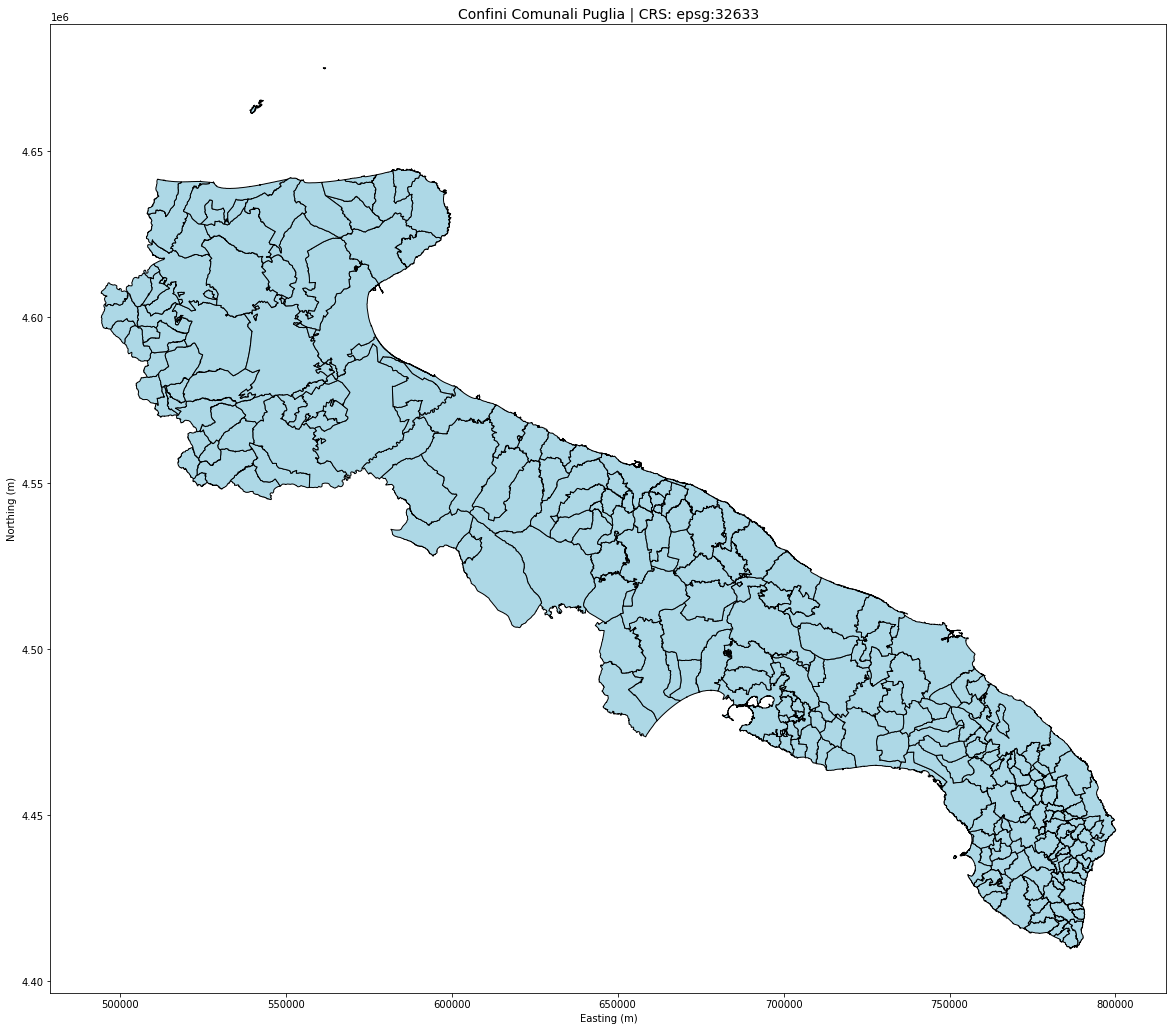

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Plot the shapefile
fig, ax = plt.subplots(figsize=(20, 18))  # Set figure size
shp.plot(ax=ax, edgecolor='black', facecolor='lightblue')

# Add a title and axis labels
ax.set_title(f"Confini Comunali Puglia | CRS: {shp.crs}", fontsize=14)
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')

# Display the plot
plt.show()

**Shapefiles** alteration and modification is a common operation, it can be performed in various ways using `Geopandas`, depending on the specific task we need.\
In this case, we will focus on adapting a **shapefile** to match the geographical extent of an NDVI **raster** calculated previously.\
The objective is to create a new **shapefile** containing only those polygons whose coordinates intersect with the raster's spatial extent, even if just a single point of intersection exists.

For this operation, we opt to save the resulting shapefile as **GeoPackage** (.gpkg) format rather than the traditional shapefile format.\
Lately GeoPackage are being used more and more than classic shapefile formats (.shp, .shx, .prj, .dbf) for several advantages:
- GeoPackage supports more efficient storage and data management, particularly for large datasets, as it allows for the storage of multiple vector and raster datasets within a single file.
- It is better suited for handling complex data types and offers improved performance when dealing with large-scale geospatial data. This makes it a more robust and scalable format compared to shapefiles, especially when working with large and spatially complex datasets.

In [ ]:
import geopandas as gpd
import rasterio
from shapely.geometry import box

# Bash snippet to create the folder that will contain the new shapefiles, if it does not already exist
!mkdir -p files/confini_comunali_Salento

# File paths
tif_path = 'files/Lecce_NDVI.tif'
output_shapefile_path = 'files/confini_comunali_Salento/intersected_polygons.gpkg'

# Extract the geographical limits of TIFF file
with rasterio.open(tif_path) as src:
    tif_bounds = src.bounds    # (minx, miny, maxx, maxy)
    tif_crs = src.crs          # TIFF reference system
    shp_crs = shp.crs          # shapefile reference system

# before proceding test if they have matching CRS
if tif_crs == shp_crs:
    print(f"Matching CRS:\n{shp_crs}\n")
    print("Proceding to polygon selection.")

    # Create a geometry (box) with the limits of TIFF file
    tif_box = box(*tif_bounds)

    # Select just polygons that intersect the TIFF box
    shp_filtered = shp[shp.intersects(tif_box)]
    print(f"Intersected polygons: {len(shp_filtered)}")

    # Save the new shapefile with the intersecting polygons as a .gpkg
    shp_filtered.to_file(output_shapefile_path, driver='GPKG')
    print(f"New shapefile saved as .gpkg in: {output_shapefile_path}")

else:
    print(f"Different CRS:\nshapefile CRS:\n{shp_crs}\n tif CRS:\n \n{tif_crs}\n")
    # Make shape CRS match with the TIFF one before proceding
    shp = shp.to_crs(tif_crs)
    print("Proceding to polygon selection.")

    # Create a geometry (box) with the limits of TIFF file
    tif_box = box(*tif_bounds)

    # Select just polygons that intersect the TIFF box
    shp_filtered = shp[shp.intersects(tif_box)]
    print(f"Intersected polygons: {len(shp_filtered)}")

    # Save the new shapefile with the intersecting polygons as a .gpkg
    shp_filtered.to_file(output_shapefile_path, driver='GPKG')
    print(f"New shapefile saved as .gpkg in: {output_shapefile_path}")


Different CRS:
shapefile CRS:
epsg:32633
 tif CRS:
 
EPSG:32634

Proceding to polygon selection.
Intersected polygons: 124
New shapefile saved as .gpkg in: files/confini_comunali_Salento/intersected_polygons.gpkg


Now, using `Geopandas` and `matplotlib` again, we can visualize the result of this operation, with a joint plot of both the original shapefile and the intersected shapefile based on the bounding box relative to the reference raster extent (NDVI).

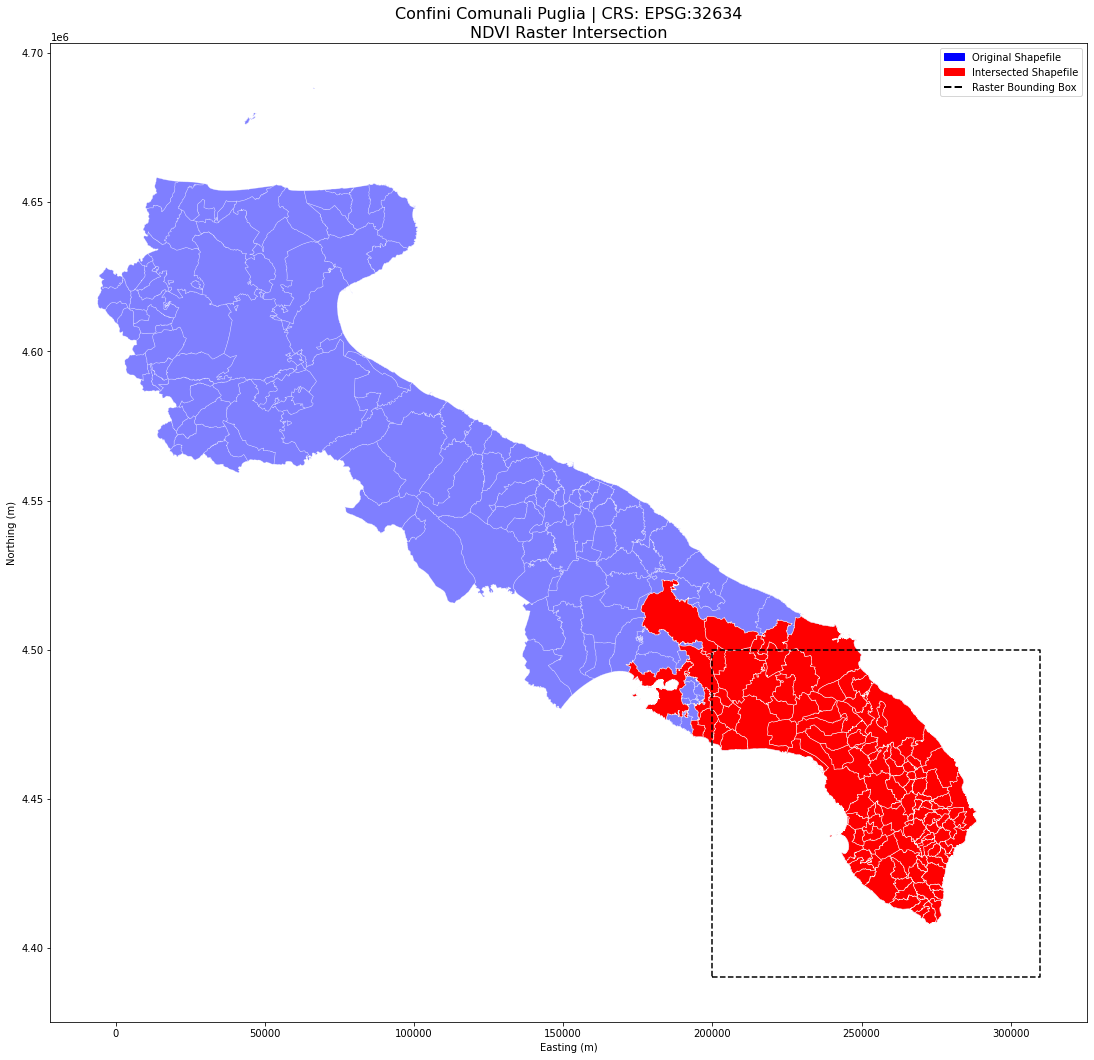

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
from shapely.geometry import box
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# 'shp' - original shapefile (GeoDataFrame)
# 'shp_filtered' - intersected shapefile (GeoDataFrame)
# 'tif_box' - bounding box of the raster (shapely.geometry box)

# Create a figure and axes for plotting
fig, ax = plt.subplots(figsize=(20, 18))

# Plot the original shapefile (shp) in blue
shp.plot(ax=ax,
         color='blue',
         edgecolor='white',
         alpha=0.5,
         linewidth=0.5)

# Plot the intersected shapefile (shp_filtered) in red
shp_filtered.plot(ax=ax,
                  color='red',
                  edgecolor='white',
                  alpha=1,
                  linewidth=0.5)

# Plot the bounding box of the raster
# tif_box is a shapely.geometry box, so we can plot it directly
x_min, y_min, x_max, y_max = tif_box.bounds
ax.plot([x_min, x_max, x_max, x_min, x_min],
        [y_min, y_min, y_max, y_max, y_min],
        color='black',
        linestyle='--')

# Set labels and title
ax.set_title(f"Confini Comunali Puglia | CRS: {tif_crs}\nNDVI Raster Intersection", fontsize=16)
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')

# Create custom legend
# legend for the original shapefile
original_shapefile_patch = mpatches.Patch(color='blue',
                                          label='Original Shapefile')
# legend for the intersected shapefile
intersected_shapefile_patch = mpatches.Patch(color='red',
                                             label='Intersected Shapefile')
# legend for the tiff bounding box
bounding_box_line = Line2D([0], [0],
                           color='black',
                           linestyle='--',
                           linewidth=2,
                           label='Raster Bounding Box')

ax.legend(handles=[original_shapefile_patch, intersected_shapefile_patch, bounding_box_line])

# Show the plot
plt.show()

We now exploit `Geopandas` and `Rasterio` together for more advanced processing.\
Specifically, we will perform a simple average of the NDVI raster values but calculated for each polygon (for each municipality area in Salento) using `shapely.geometry`.
Due to RAM issues (often present in python working environments) to do this we will do two tricks:
- use the lighter <u>NDVI_resized.tif</u> already computed previously, whose 100m resolution instead of the native 20m will allow us to compute these areal averages more easily.
- define a smaller pixel chunk size for compute mean without any RAM chocking.

In [ ]:
import rasterio
import numpy as np
from rasterio.mask import mask
from shapely.geometry import mapping
from rasterio.windows import Window

# Open the raster
with rasterio.open('files/Lecce_NDVI_resized.tif') as src:
    # List to store mean NDVI values for each polygon
    mean_values = []

    # Get raster dimensions
    width = src.width
    height = src.height

    # Define a smaller pixel chunk size (e.g., 10000x10000)
    chunk_size = 10000

    # Loop over the Salento's polygons ('shp_filtered')
    for _, row in shp_filtered.iterrows():
        geometry = [mapping(row['geometry'])]

        # Initialize a variable to hold the masked raster data for the current polygon
        masked_image = []

        # Process the raster in chunks
        for start_x in range(0, width, chunk_size):
            for start_y in range(0, height, chunk_size):
                # Define the window to read
                window = Window(start_x, start_y, chunk_size, chunk_size)

                try:
                    # Read the raster data for the current window (i.e., chunk)
                    data = src.read(1, window=window)  # Read the first band (because NDVI is a single-band raster)

                    # Mask the raster using the polygon geometry
                    out_image, out_transform = mask(src, geometry, crop=True)

                    # Now we have the masked data for the polygon and can calculate its mean
                    # We need to be sure to mask out any no-data values
                    masked_data = out_image[0][~np.isnan(out_image[0])]  # Mask no-data values

                    # Append the data to the list
                    masked_image.append(masked_data)

                except Exception as e:
                    # Exception print needed in case of debugging
                    print(f"Error while processing window {(start_x, start_y)}: {e}")

        # After processing all chunks, combine the chunks and calculate the mean
        if masked_image:  # Only calculate the mean if the list isn't empty
            masked_image = np.concatenate(masked_image)  # Combine the chunks
            mean_value = masked_image.mean()  # Calculate the mean of the pixel values
        else:
            mean_value = None  # No valid pixels in the polygon

        mean_values.append(mean_value)

    # Fai una copia esplicita del DataFrame per evitare problemi di copia
    shp_filtered_copy = shp_filtered.copy()

    # Add the mean values to the shapefile
    shp_filtered_copy['mean_ndvi'] = mean_values

    # Save the updated shapefile
    outfile = "files/confini_comunali_Salento/mean_NDVI_Salento.gpkg"
    shp_filtered_copy.to_file(outfile, driver='GPKG')
    print("NDVI average value computed.\n Results in:", outfile)


NDVI average value computed.
 Results in: files/confini_comunali_Salento/mean_NDVI_Salento.gpkg


We can always use `Geopandas` and `matplotlib` to plot the result

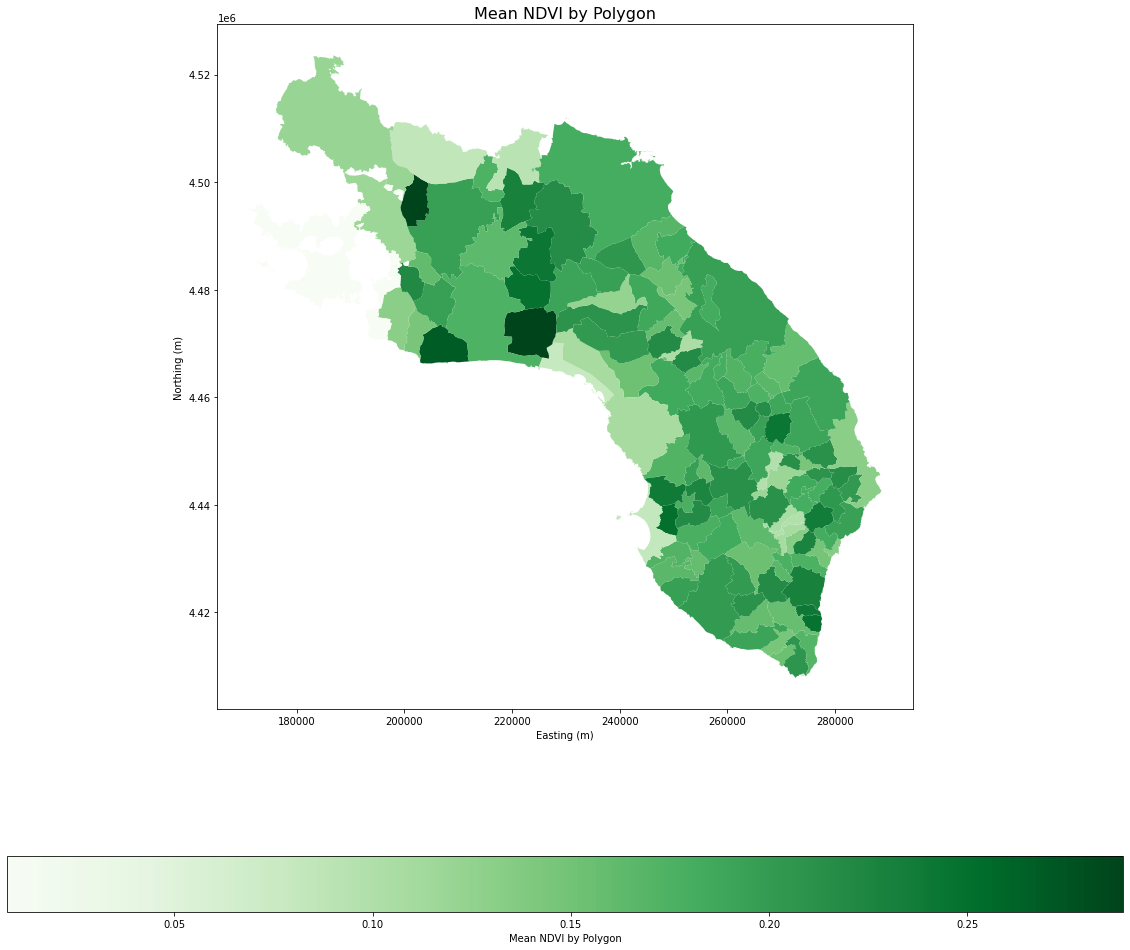

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Plot the shapefile with 'mean_ndvi' as the color parameter
fig, ax = plt.subplots(figsize=(20, 18))

# Plot using a green color map, scaling colors based on the 'mean_ndvi' column
shp_filtered_copy.plot(column='mean_ndvi', ax=ax, legend=True,
              cmap='Greens',  # Using a green color map
              legend_kwds={'label': "Mean NDVI by Polygon",
                           'orientation': "horizontal"})

# Add title and labels
ax.set_title('Mean NDVI by Polygon', fontsize=16)
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')

# Show the plot
plt.show()

Now, using `Geopandas` and `pandas` we can transform a list of EPSG:32634 coordinates (they can be a possible in situ sampling points) into a GeoPackage points shapefile, to be used for further geospatial processing.

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

# Coordinates in EPSG:32634
coordinates = [
    (273428.62, 4471528.55),
    (273333.06, 4471504.63),
    (273155.69, 4471459.57),
    (272889.96, 4471402.66),
    (272627.77, 4471357.00),
    (272334.69, 4471315.93),
    (271986.81, 4471271.98),
    (271693.17, 4471242.75),
    (271364.28, 4471193.71),
    (270979.83, 4471147.29),
    (270558.81, 4471098.37),
]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    pd.DataFrame(coordinates, columns=["longitude", "latitude"]),
    geometry=[Point(lon, lat) for lon, lat in coordinates],
    crs="EPSG:32634"  # Coordinate reference system
)

# Save to GeoPackage
gdf.to_file("files/extraction_points.gpkg", driver="GPKG")

print("Extraction Points has been saved successfully as .gpkg.")


Extraction Points has been saved successfully as .gpkg.


In [ ]:
pnt = gpd.read_file("files/extraction_points.gpkg")
pnt

longitude    latitude                        geometry
0   273428.62  4471528.55  POINT (273428.620 4471528.550)
1   273333.06  4471504.63  POINT (273333.060 4471504.630)
2   273155.69  4471459.57  POINT (273155.690 4471459.570)
3   272889.96  4471402.66  POINT (272889.960 4471402.660)
4   272627.77  4471357.00  POINT (272627.770 4471357.000)
5   272334.69  4471315.93  POINT (272334.690 4471315.930)
6   271986.81  4471271.98  POINT (271986.810 4471271.980)
7   271693.17  4471242.75  POINT (271693.170 4471242.750)
8   271364.28  4471193.71  POINT (271364.280 4471193.710)
9   270979.83  4471147.29  POINT (270979.830 4471147.290)
10  270558.81  4471098.37  POINT (270558.810 4471098.370)

Now, with `Geopandas` and `Rasterio` together we can use the point shapefile to extract information from the 20m resolution NDVI raster and the average NDVI per municipality contained in the <u>extraction_points.gpkg</u> shapefile.

In [ ]:
import geopandas as gpd
import rasterio
from shapely.geometry import Point

# Load the extraction points GeoPackage
pnt = gpd.read_file("files/extraction_points.gpkg")

# Load the 20m resolution NDVI raster
ndvi_raster_path = "files/Lecce_NDVI.tif"
with rasterio.open(ndvi_raster_path) as src:
    # Ensure the points' CRS matches the raster's CRS
    pnt = pnt.to_crs(src.crs)

    # Function to extract raster value at point
    def extract_ndvi_value(row):
        # Extract raster value at point location
        point = [row.geometry.x, row.geometry.y]
        row_idx, col_idx = src.index(point[0], point[1])
        return src.read(1)[row_idx, col_idx]

    # Apply extraction function to points
    pnt['ndvi_value'] = pnt.apply(extract_ndvi_value, axis=1)

# Load the mean NDVI vector file
gdf_mean_ndvi = gpd.read_file("files/confini_comunali_Salento/mean_NDVI_Salento.gpkg")

# Ensure that both GeoDataFrames have the same CRS
gdf_mean_ndvi = gdf_mean_ndvi.to_crs(pnt.crs)

# Function to extract mean NDVI value from the mean NDVI shapefile
def extract_mean_ndvi(row):
    # This function will get the value from the 'mean_ndvi' attribute
    # In this case, being all polygons we will use spatial join
    # Starting find the polygon that contains the point and extract the mean_ndvi value
    containing_polygon = gdf_mean_ndvi[gdf_mean_ndvi.geometry.contains(row.geometry)]

    if not containing_polygon.empty:
        return containing_polygon.iloc[0]['mean_ndvi']
    else:
        return None  # In case no polygon is found, return None

# Apply the extraction function to points
pnt['mean_ndvi_value'] = pnt.apply(extract_mean_ndvi, axis=1)

# Check for duplicate column names and remove any if necessary
pnt = pnt.loc[:, ~pnt.columns.duplicated()]

# Save the updated GeoDataFrame to as a new GeoPackage
pnt.to_file("files/extraction_points_NDVI.gpkg", driver="GPKG")

print("GeoPackage with NDVI values has been saved successfully.")



GeoPackage with NDVI values has been saved successfully.


Let's check the results

In [ ]:
NDVI_pnt = gpd.read_file("files/extraction_points_NDVI.gpkg")
NDVI_pnt

longitude    latitude  ndvi_value  mean_ndvi_value  \
0   273428.62  4471528.55    0.329571         0.158953   
1   273333.06  4471504.63   -0.051338         0.158953   
2   273155.69  4471459.57    0.361765         0.158953   
3   272889.96  4471402.66    0.457857         0.158953   
4   272627.77  4471357.00    0.410326         0.158953   
5   272334.69  4471315.93    0.318457         0.158953   
6   271986.81  4471271.98    0.392727         0.158953   
7   271693.17  4471242.75    0.412121         0.158953   
8   271364.28  4471193.71    0.330433         0.158953   
9   270979.83  4471147.29    0.340979         0.158953   
10  270558.81  4471098.37    0.071696         0.195418   

                          geometry  
0   POINT (273428.620 4471528.550)  
1   POINT (273333.060 4471504.630)  
2   POINT (273155.690 4471459.570)  
3   POINT (272889.960 4471402.660)  
4   POINT (272627.770 4471357.000)  
5   POINT (272334.690 4471315.930)  
6   POINT (271986.810 4471271.980)  
7   POINT (271693.170 4471242.750)  
8   POINT (271364.280 4471193.710)  
9   POINT (270979.830 4471147.290)  
10  POINT (270558.810 4471098.370)

Everything seems correct.\
Then we move to a fancy visualization of collected data.\
To better express points data we will plot jointly:
- a `matplotlib` histogram which will show the trend of NDVI values and the average for each point;
- a geospatial plot using `Geopandas` and `Rasterio` of an NDVI raster excerpt at 20m resolution, from which the values were extracted, with focus detail on the extraction points area.


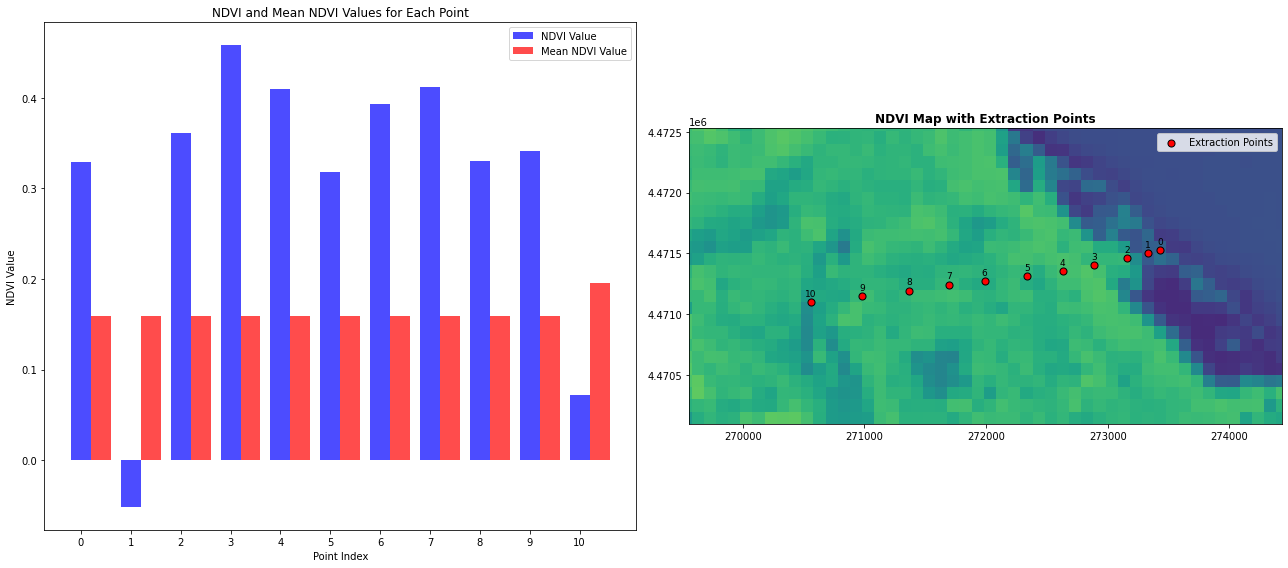

In [ ]:
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from rasterio.plot import show
from matplotlib import colors
from shapely.geometry import Point

# Load the data
NDVI_pnt = gpd.read_file("files/extraction_points_NDVI.gpkg")

# Open the raster file
raster_path = 'files/Lecce_NDVI.tif'
raster_path_resized = 'files/Lecce_NDVI_resized.tif' # for memory issues

with rasterio.open(raster_path_resized) as src:
    # Extract raster bounds to determine the extent for zooming in
    bounds = src.bounds

    # Zooming into the bounding box around the points' coordinates
    min_x, min_y, max_x, max_y = NDVI_pnt.geometry.total_bounds

    # Create the figure with 2 subplots: one for histograms and one for the map
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Plot the histograms of 'ndvi_value' and 'mean_ndvi_value' for each point
    axes[0].bar(NDVI_pnt.index,
                NDVI_pnt['ndvi_value'],
                alpha=0.7,
                label='NDVI Value',
                color='blue',
                width=0.4,
                align='center')

    # that +0.4 is used to slightly shift the bars so they dont overlap
    axes[0].bar(NDVI_pnt.index + 0.4,
                NDVI_pnt['mean_ndvi_value'],
                alpha=0.7,
                label='Mean NDVI Value',
                color='red',
                width=0.4,
                align='center')
    axes[0].set_xlabel('Point Index')
    axes[0].set_ylabel('NDVI Value')
    axes[0].set_title('NDVI and Mean NDVI Values for Each Point')
    axes[0].legend()

    # Set x-axis ticks with a step of 1
    axes[0].set_xticks(np.arange(len(NDVI_pnt)))

    # Plot the raster map with the points
    show(src, ax=axes[1],
         cmap='viridis',
         title="NDVI Map with Extraction Points")

    # Add the points to the map
    axes[1].scatter(NDVI_pnt.geometry.x,
                    NDVI_pnt.geometry.y,
                    color='red',
                    s=50,
                    edgecolor='black',
                    label='Extraction Points')

    # Add the point IDs above each point
    for idx, row in NDVI_pnt.iterrows():
        axes[1].text(row.geometry.x,
                     row.geometry.y + 50,
                     str(idx),
                     color='black',
                     fontsize=9,
                     ha='center')

    # Set zoom limits based on the extent of the points
    axes[1].set_xlim(min_x - 1000, max_x + 1000)  # Adjust zoom window as necessary
    axes[1].set_ylim(min_y - 1000, max_y + 1000)

    # Add a legend for the raster map
    axes[1].legend(loc='upper right')

    # Show the plot
    plt.tight_layout()
    plt.show()


Now let's try working with another type of vector shape.\
Let's try to create a polyline from the extraction_points used earlier, after which we create a 100m buffer around it.\
To do this we use `Geopandas` and `LineString`.

In [ ]:
import geopandas as gpd
from shapely.geometry import LineString

# Creating a polyline from points
points = gpd.read_file("files/extraction_points.gpkg")
line = LineString(points.geometry.tolist())

# Save polyline as GeoPackage
line_gdf = gpd.GeoDataFrame(geometry=[line], crs=points.crs)
line_gdf.to_file("files/section_line.gpkg", driver="GPKG")

# Create a 100m buffer around the polyline to make it a precise polygonal area
buffer = line.buffer(100)
buffer_gdf = gpd.GeoDataFrame(geometry=[buffer], crs=points.crs)

Let's start by using the polyline.\
With the polyline, it is possible to do a multiple capillary extraction from the NDVI raster, in order to plot a index profile along the path.\
This is no different from the extraction we did previously for points only, but now using both `LineString` and `Point` from `shapely.geometry` together with `geopandas`.\
We will also plot the extraction points as a reference during the profile.

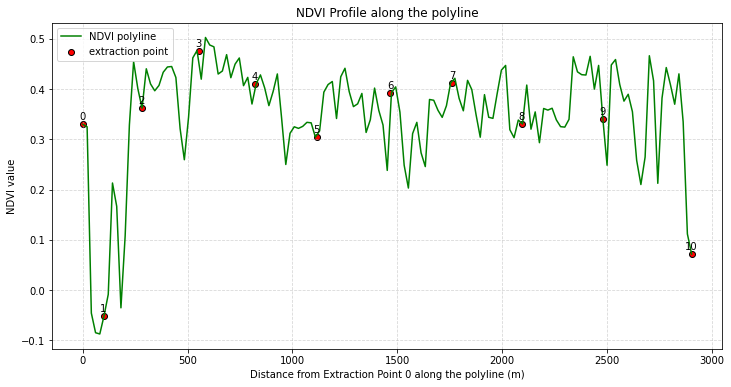

In [ ]:
import numpy as np
import rasterio
import geopandas as gpd
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt

# File paths
ndvi_path = "files/Lecce_NDVI.tif"
polyline_path = "files/section_line.gpkg"
points_path = 'files/extraction_points_NDVI.gpkg'

# read NDVI raster
with rasterio.open(ndvi_path) as src:
    ndvi_data = src.read(1)  # Band 1
    ndvi_transform = src.transform

# read polyline and points geopackage
gdf_line = gpd.read_file(polyline_path)
gdf_points = gpd.read_file(points_path)

# Estrai la polyline dal GeoDataFrame (ad esempio, la prima riga)
polyline = gdf_line.geometry.iloc[0]

# function to extract NDVI values along the polyline
def extract_ndvi_along_line(polyline, src):
    distances = np.linspace(0, polyline.length, int(polyline.length // 20))
    points = [polyline.interpolate(d) for d in distances]
    coords = [(p.x, p.y) for p in points]
    ndvi_values = [v[0] for v in src.sample(coords)]
    return distances, ndvi_values, points

# extract NDVI values along the polyline
with rasterio.open(ndvi_path) as src:
    distances, ndvi_values, line_points = extract_ndvi_along_line(polyline, src)

# Find extraction points on the polyline
point_distances = [polyline.project(p) for p in gdf_points.geometry]

# Plot NDVI profile
plt.figure(figsize=(12, 6))
plt.plot(distances, ndvi_values, color='green', label='NDVI polyline')

# Add labels for extraction points
for idx, (dist, row) in enumerate(zip(point_distances, gdf_points.iterrows())):
    value_idx = np.argmin(np.abs(distances - dist))
    plt.scatter(dist, ndvi_values[value_idx], color='red', edgecolor='black', label='extraction point' if idx == 0 else "")
    plt.text(dist, ndvi_values[value_idx] + 0.009, f'{idx}', color='black', fontsize=10, ha='center')

# Graph details
plt.xlabel('Distance from Extraction Point 0 along the polyline (m)')
plt.ylabel('NDVI value')
plt.title('NDVI Profile along the polyline')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

After creating the polyline and buffer area we can try plotting them using again `matplotlib` and `geopandas`.\
In this case we will try a fancy plot displaying also the 20m resolution NDVI raster as basemap, complete with legend and coordinate references on the axes.

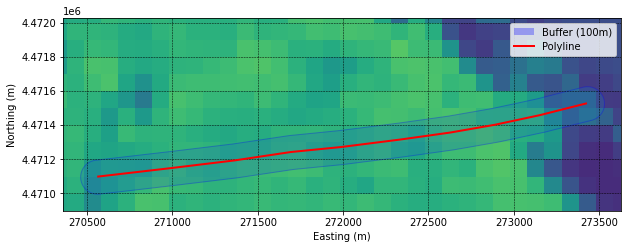

In [ ]:
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


# Visualize the polyline on the NDVI map
raster_path = 'files/Lecce_NDVI.tif'
raster_path_resized = 'files/Lecce_NDVI_resized.tif' # for memory issues

with rasterio.open(raster_path_resized) as src:
    fig, ax = plt.subplots(figsize=(10, 10))
    show(src, ax=ax, cmap='viridis')

    # Plot the polyline and its buffer
    line_gdf.plot(ax=ax, edgecolor='red', linewidth=2)
    buffer_gdf.plot(ax=ax, edgecolor='blue', alpha=0.3)

    # Create custom legend
    # Legend for the polyline
    polyline_leg = Line2D([0], [0], color='red', linewidth=2, label='Polyline')

    # Legend for the buffer area
    buffer_leg = Patch(facecolor='blue', alpha=0.3, label='Buffer (100m)')

    # Compose legend items
    ax.legend(handles=[buffer_leg, polyline_leg], loc='upper right')

    # Detail zoom on the polyline area
    minx, miny, maxx, maxy = line_gdf.total_bounds
    ax.set_xlim(minx - 200, maxx + 200)
    ax.set_ylim(miny - 200, maxy + 500)

    ax.set_xlabel('Easting (m)')
    ax.set_ylabel('Northing (m)')
    ax.grid(True, which='both', color='black', linestyle='--', linewidth=0.5)

plt.show()


We can use this newly created buffer area to clip the NDVI raster.

In [ ]:
import rasterio
from rasterio.mask import mask

# Cropping the NDVI raster using the buffer
with rasterio.open(ndvi_path) as src:
    out_image, out_transform = mask(src, [buffer], crop=True)

    # Set NoData values to 255
    out_image[out_image == src.nodata] = 255

    # Copy the profile of the original raster and update
    out_meta = src.meta.copy()
    out_meta.update({
        "driver": "GTiff",
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform,
        "nodata": 255  # Set NoData value to 255
    })

    # Save the raster crop
    out_path = 'files/section_line_NDVI.tif'
    with rasterio.open(out_path, "w", **out_meta) as dest:
        dest.write(out_image)

print("Cropping saved in ", out_path)

Cropping saved in  files/section_line_NDVI.tif


In the end we can plot the buffer area cropped 20m resolution NDVI along with the extraction points used into the creation of the polyline, again using `matplotlib` and `geopandas`.\
In this case we will keep transparency for crop process nodata pixels.\
Also this plot will have legend and coordinate references on the axes.

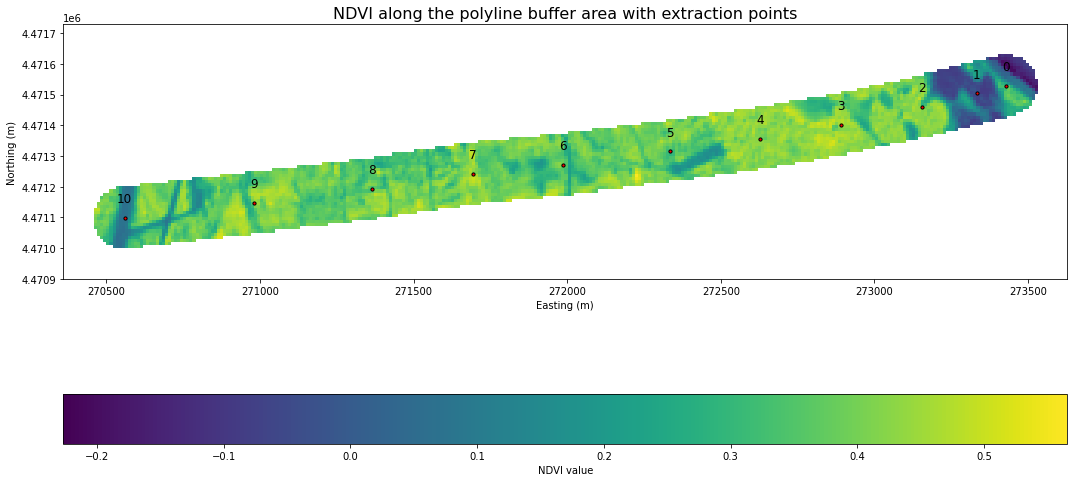

In [ ]:
import numpy as np
import rasterio
import geopandas as gpd
from matplotlib import pyplot as plt

# Paths
raster_path = 'files/section_line_NDVI.tif'
points_path = 'files/extraction_points.gpkg'

# Read the raster
with rasterio.open(raster_path) as src:
    raw_data = src.read(1)
    # nodata are forcefully read as '0' instead of '255', so we filter the data='0'
    data = np.ma.masked_equal(raw_data, 0)
    # Get the spatial extent for the plot
    spatial_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# Plotting
fig, ax = plt.subplots(figsize=(18, 14))
chm_plot = ax.imshow(data, cmap='viridis', extent=spatial_extent)

# Plot the vector points (extraction points)
gdf = gpd.read_file(points_path)
gdf.plot(ax=ax, color='red', edgecolor='black', marker='o', markersize=10)

# Add the point IDs above each point
for idx, row in gdf.iterrows():
    ax.text(row.geometry.x,
                 row.geometry.y + 50,
                 str(idx),
                 color='black',
                 fontsize=12,
                 ha='center')

# Add legend (colorbar) with custom legend_kwds
colorbar = fig.colorbar(chm_plot, ax=ax, orientation='horizontal')
colorbar.set_label("NDVI value")

# Add gridlines
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')
ax.set_title("NDVI along the polyline buffer area with extraction points", fontsize=16)
# Detail zoom on the polyline area
ax.set_xlim(minx - 200, maxx + 200)
ax.set_ylim(miny - 200, maxy + 200)
plt.show()


---
---

## 4 - Exercises

### **Spatial Data Visualization and Analysis**

Write code and document your process in Markdown cells.

### **Input**
1. <u>**Dataset Import** </u>
- Choose a publicly available shapefile (.gpkg, .shp etc) and raster file (.tif, .jp2 etc) or
- Use the provided raster and shapefiles used in this lesson.

### **Operations:**
2. <u>**Geospatial Data Handling with GeoPandas**</u>
- Load the vector data file using GeoPandas.
- Explore the dataset using gdf.info(), gdf.head(), and gdf.describe().
- Extract relevant features (e.g., a specific polygon or point geometry) from the GeoDataFrame.
- Create a buffer around a specific polygon feature and store it in a new column.
- Perform spatial operations, such as overlaying vector data and extracting points inside the polygon.
- Plot the vector data on a map with GeoPandas.

3. <u>**NDVI Profile Extraction with Rasterio**</u>
- Read a raster using Rasterio.
- Extract pixel values along a defined line (e.g., a transect) using spatial interpolation (similar to previous examples).
- Handle missing or NoData values from the raster by setting them to a specific value (e.g., 255) and applying masking techniques.
- Plot the pixel values profile along the transect using Matplotlib or Seaborn.

4. <u>**Data Visualization with Matplotlib and Seaborn**</u>
- Create visualizations to explore the relationship between pixel values and specific spatial features (e.g., elevation, land use, or vegetation type).
- Customize the plot by adding labels, titles, gridlines, and a legend.
- Add a Seaborn heatmap or scatterplot to visualize the distribution of pixel values across different areas of the study region.

### **Output**
Save any type of output resulting from the processing and analysis of rasters and shapefiles in:
>exercise/result.csv

---
---


In [ ]:
## Do you exercise here:

---
---